Table of contents:

- Part 01 - Data Preprocessing 


- Part 02 - Data Analysis & Visualization


- Part 03 - Machine Learning


- Part 04 - Discussion


  ---

  
 # <span style="color:MediumSlateBlue     ">Final Project | Explainer Notebook.</span>

 ## <span style="color:MediumSlateBlue     ">Part 01 - Data Preprocessing.</span>


<span style="color:MediumSlateBlue     ">**02806 Social data analysis and visualization**</span>

<span style="color:MediumSlateBlue     ">**May 2021**</span>

<span style="color:MediumSlateBlue     "> **Data-sets Reference: Motor-Vihecle-Collisions<sup>[link](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)</sup>, Weather-Data<sup>[link](https://www.ncdc.noaa.gov/cdo-web/search)</sup>, Speed-Limit-Data<sup>[link](https://data.cityofnewyork.us/Transportation/VZV_Speed-Limits/7n5j-865y)**</sup></span>

  ---
  

  
<span style="color:Orange">**Please note!**</span> If you are using Jupyter to display this ".ipynb" file You might need to make it *Trusted* in order to let Jupyter render the plots.
   


---

# <span style="color:MediumSlateBlue">Import needed libraries:</span>

---


In [1]:
""" IPython """
from IPython.display import display
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

""" Data Handeling """
import numpy as np 
import pandas as pd 
import calendar
import os 
from scipy import stats

""" for warnings """
import warnings 
warnings.simplefilter("ignore")


---

# <span style="color:MediumSlateBlue">Load data:</span>

---


In [2]:
""" Path """
fileName = 'Motor_Vehicle_Collisions.csv'
filePath = os.path.abspath(os.path.join(os.getcwd(), fileName))

""" Load """
Data =  pd.read_csv(filePath);


---

# <span style="color:MediumSlateBlue">Getting to know the Dataset:</span>

---

Let's start in getting to know the dataset. In this section we introduce a function to track the **reduction in data** when doing the preparation and cleaning. 

The reader gets familiar with the whole process starting from **vewing the data**, the **column types** and the different ways of tracking the number of **missing values**.

In [3]:
""" Define a function to track Reduction in data when doing the data preparation and cleaning later on """

Reduction = {}
Reduction_Percentage = {}
N = Data.shape[0]
def reduc(step):
    global N 
    global Reduction
    global Reduction_Percentage
    N_before = N
    N_after = Data.shape[0]
    Reduction[step] = N_after
    Reduction_Percentage[step] = (N_before - N_after) / N_before
    print(f'Number of observation: {N_after}  (--{N_before-N_after})')
    print(f'Reduction: {N_before - N_after}  ({(N_before - N_after) / N_before} %)')
    N = Data.shape[0]

In [4]:
""" Initilize Reduction in data """
reduc('Init')

Number of observation: 1769702  (--0)
Reduction: 0  (0.0 %)


In [5]:
""" Overview """
Data.head(n=5)

CRASH DATE CRASH TIME        BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  10/18/2020      20:00       BROOKLYN    11210  40.630295 -73.947450   
1  11/26/2020       3:06            NaN      NaN        NaN        NaN   
2  11/05/2020      19:40  STATEN ISLAND    10310  40.630276 -74.107956   
3  12/02/2020       8:00         QUEENS    11414  40.660072 -73.845650   
4  10/19/2020       1:55          BRONX    10468        NaN        NaN   

                  LOCATION                    ON STREET NAME  \
0   (40.630295, -73.94745)                               NaN   
1                      NaN  CROSS BAY BOULEVARD                
2  (40.630276, -74.107956)                               NaN   
3   (40.660072, -73.84565)                               NaN   
4                      NaN  UNIVERSITY HEIGHTS BRIDGE          

   CROSS STREET NAME                           OFF STREET NAME  ...  \
0                NaN  2236      NOSTRAND AVENUE                 ...   
1      SHORE PARKWAY                                       NaN  ...   
2                NaN  532       FOREST AVENUE                   ...   
3                NaN  87-14     158 AVENUE                      ...   
4  WEST FORDHAM ROAD                                       NaN  ...   

    CONTRIBUTING FACTOR VEHICLE 2  CONTRIBUTING FACTOR VEHICLE 3  \
0                             NaN                            NaN   
1  Driver Inattention/Distraction                            NaN   
2                     Unspecified                            NaN   
3                     Unspecified                            NaN   
4                             NaN                            NaN   

   CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
0                            NaN                            NaN       4359260   
1                            NaN                            NaN       4370998   
2                            NaN                            NaN       4365813   
3                            NaN                            NaN       4372508   
4                            NaN                            NaN       4359179   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0  Station Wagon/Sport Utility Vehicle                                  NaN   
1                                Sedan                                Sedan   
2                                Sedan  Station Wagon/Sport Utility Vehicle   
3  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   
4  Station Wagon/Sport Utility Vehicle                                  NaN   

   VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
0                  NaN                 NaN                 NaN  
1                  NaN                 NaN                 NaN  
2                  NaN                 NaN                 NaN  
3                  NaN                 NaN                 NaN  
4                  NaN                 NaN                 NaN  

[5 rows x 29 columns]

In [6]:
""" Data shape """
Data.shape

(1769702, 29)

In [7]:
""" Columns' names """
Data.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [8]:
""" Columns types """
Data.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

Below we see the **NaN values per column**. The NYC collision dataset that we use, **log the 3rd, 4rd and 5th factors in a collision by loging the vehicle types and the accordingly contributing factors** but very reraly the is more than a second contributing factor.

We realise that there are many missing values there because the collisions normally is limited between 2 factors, the cars in the car crash. 

These values will be handled later.

In [9]:
""" Count columns' NaN values in desending order """
sorted(list(zip(Data.columns,Data.isna().sum(axis=0).values)) , key= lambda row: row[1], reverse=True)

[('VEHICLE TYPE CODE 5', 1763172),
 ('CONTRIBUTING FACTOR VEHICLE 5', 1762996),
 ('VEHICLE TYPE CODE 4', 1744800),
 ('CONTRIBUTING FACTOR VEHICLE 4', 1744084),
 ('VEHICLE TYPE CODE 3', 1654119),
 ('CONTRIBUTING FACTOR VEHICLE 3', 1650864),
 ('OFF STREET NAME', 1504966),
 ('CROSS STREET NAME', 623675),
 ('ZIP CODE', 544174),
 ('BOROUGH', 543962),
 ('ON STREET NAME', 357104),
 ('VEHICLE TYPE CODE 2', 293896),
 ('CONTRIBUTING FACTOR VEHICLE 2', 251078),
 ('LATITUDE', 209365),
 ('LONGITUDE', 209365),
 ('LOCATION', 209365),
 ('VEHICLE TYPE CODE 1', 9355),
 ('CONTRIBUTING FACTOR VEHICLE 1', 4987),
 ('NUMBER OF PERSONS KILLED', 31),
 ('NUMBER OF PERSONS INJURED', 18),
 ('CRASH DATE', 0),
 ('CRASH TIME', 0),
 ('NUMBER OF PEDESTRIANS INJURED', 0),
 ('NUMBER OF PEDESTRIANS KILLED', 0),
 ('NUMBER OF CYCLIST INJURED', 0),
 ('NUMBER OF CYCLIST KILLED', 0),
 ('NUMBER OF MOTORIST INJURED', 0),
 ('NUMBER OF MOTORIST KILLED', 0),
 ('COLLISION_ID', 0)]

Below are the attributes with data filled. `CRASH DATE` and `CRASH TIME` are the the first thing police officers write, as well as the **number of people killed or injured**. We see some missing values on generaly some `STREET NAMEs`, `BOROUGHs`, as well as the 3rd, 4th and 5th factors are rarely added for the aforementioned factors. 

In [10]:
""" Count columns' Non-NaN values in desending order """
sorted(list(zip(Data.count().keys(),Data.count().values)), key= lambda row: row[1], reverse=True)

[('CRASH DATE', 1769702),
 ('CRASH TIME', 1769702),
 ('NUMBER OF PEDESTRIANS INJURED', 1769702),
 ('NUMBER OF PEDESTRIANS KILLED', 1769702),
 ('NUMBER OF CYCLIST INJURED', 1769702),
 ('NUMBER OF CYCLIST KILLED', 1769702),
 ('NUMBER OF MOTORIST INJURED', 1769702),
 ('NUMBER OF MOTORIST KILLED', 1769702),
 ('COLLISION_ID', 1769702),
 ('NUMBER OF PERSONS INJURED', 1769684),
 ('NUMBER OF PERSONS KILLED', 1769671),
 ('CONTRIBUTING FACTOR VEHICLE 1', 1764715),
 ('VEHICLE TYPE CODE 1', 1760347),
 ('LATITUDE', 1560337),
 ('LONGITUDE', 1560337),
 ('LOCATION', 1560337),
 ('CONTRIBUTING FACTOR VEHICLE 2', 1518624),
 ('VEHICLE TYPE CODE 2', 1475806),
 ('ON STREET NAME', 1412598),
 ('BOROUGH', 1225740),
 ('ZIP CODE', 1225528),
 ('CROSS STREET NAME', 1146027),
 ('OFF STREET NAME', 264736),
 ('CONTRIBUTING FACTOR VEHICLE 3', 118838),
 ('VEHICLE TYPE CODE 3', 115583),
 ('CONTRIBUTING FACTOR VEHICLE 4', 25618),
 ('VEHICLE TYPE CODE 4', 24902),
 ('CONTRIBUTING FACTOR VEHICLE 5', 6706),
 ('VEHICLE TYPE C

Below, we spot some **0's** in the `LATITUDE` and `LONGITUDE` that doesn't make sense. These values will be handled later on.

In [11]:
""" Count columns' zeros values """
(Data == 0).sum(axis=0)

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                                0
ZIP CODE                               0
LATITUDE                            1766
LONGITUDE                           1766
LOCATION                               0
ON STREET NAME                         0
CROSS STREET NAME                      0
OFF STREET NAME                        0
NUMBER OF PERSONS INJURED        1414110
NUMBER OF PERSONS KILLED         1767530
NUMBER OF PEDESTRIANS INJURED    1682257
NUMBER OF PEDESTRIANS KILLED     1768543
NUMBER OF CYCLIST INJURED        1729563
NUMBER OF CYCLIST KILLED         1769535
NUMBER OF MOTORIST INJURED       1540017
NUMBER OF MOTORIST KILLED        1768883
CONTRIBUTING FACTOR VEHICLE 1          0
CONTRIBUTING FACTOR VEHICLE 2          0
CONTRIBUTING FACTOR VEHICLE 3          0
CONTRIBUTING FACTOR VEHICLE 4          0
CONTRIBUTING FACTOR VEHICLE 5          0
COLLISION_ID                           0
VEHICLE TYPE COD

Some times **NaN values can come in form of empty strings**. We check this posibility in case we spot some extra missing values. There are not any.

In [12]:
""" Count columns' empty strings """
(Data == '').sum(axis=0)

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
LOCATION                         0
ON STREET NAME                   0
CROSS STREET NAME                0
OFF STREET NAME                  0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
VEHICLE TYPE CODE 4              0
VEHICLE TYPE CODE 5 

 
---

# <span style="color:MediumSlateBlue">Data Cleaning:</span>

---

After this  initial check on the data, we are proceeding into the Data Cleaning.

In this section we **finalize the New York City Collisions dataset from 2013-2020** in order to merge (in the next section) the **weather and speed limit features**. 

The steps in doing the clean consider **dropping unneeded features** with the accordingly justification.

## Drop unneeded features:

In this section we drop the `COLLISION_ID` since it's not informative. We drop the `LOCATION` since we have `LATITUDE` and `LONGITUTE`. We drop the `PEDESTRIANS`, `CYCLISTS`, `MOTORIST` features sience we have the `NUMBER OF PERSONS INJURED` and `NUMBER OF PERSONS KILLED` features and finally we drop the 3rd, 4th and 4th collision factors (as discussed above).

Finally, we check for the ammount of data dropped overall. We see that we **drop only the 0,3% of the total data**. That is a very satisfying overall!

In [13]:
""" Drop 'COLLISION_ID' since it's not informative """
Data = Data.drop(columns=['COLLISION_ID'])

""" Drop 'LOCATION' since we have 'LATITUDE', 'LONGITUDE' """
Data = Data.drop(columns=['LOCATION'])

""" Drop 'CROSS STREET NAME' and 'OFF STREET NAME' since we have 'ON STREET NAME' """
Data = Data.drop(columns=['CROSS STREET NAME', 'OFF STREET NAME'])

""" Drop PEDESTRIANS, CYCLIST and MOTORIST features since we have PERSONS features """
Data = Data.drop(columns = ['NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED', 
                            'NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED', 
                            'NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED'])

""" Consider only Collisions with two vehicles involve and Drop other unrelated features """
Data = Data[
        (Data['CONTRIBUTING FACTOR VEHICLE 3'].isna())|
        (Data['CONTRIBUTING FACTOR VEHICLE 4'].isna())|
        (Data['CONTRIBUTING FACTOR VEHICLE 5'].isna())|
        (Data['VEHICLE TYPE CODE 3'].isna())|
        (Data['VEHICLE TYPE CODE 4'].isna())|
        (Data['VEHICLE TYPE CODE 5'].isna())]
Data = Data.drop(columns=['CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5','VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'])

""" Track Reduction in data """
reduc('MVC with only two vehicles involves')

Number of observation: 1763247  (--6455)
Reduction: 6455  (0.0036475067553746335 %)


 
---

## <span style="color:MediumSlateBlue">Missing Data:</span>

---

In this section we drop all the NaN values on the attributes `ON STREET NAME`, `LATITUDE`, `LONGITUDE`, `NUMBER OF PERSONS KILLED` and `NUMBER OF PERSONS INJURED`. We also drop the accidents that have `LATITUDE` and `LONGITUDE` == 0 because the location is not recorded. 

Finally, we see that we loose **29% of the data** but still the number of rows is more than sufiecient to have a represented dataset.

In [14]:
""" Count columns' NaN values in desending order """
sorted(list(zip(Data.columns,Data.isna().sum(axis=0).values)) , key= lambda row: row[1], reverse=True)

""" Count columns' zeros values """
(Data == 0).sum(axis=0)

""" Count columns' empty strings """
(Data == '').sum(axis=0)

""" Drop rows that has a messing value in one of important features """
Data = Data[
    Data['ON STREET NAME'].notna()  & # important feature for adding speed limit data later on.
    Data['LATITUDE' ].notna()       & # imporatnt feature for map plots 
    Data['LONGITUDE'].notna()       & # imporatnt feature for map plots
    Data['NUMBER OF PERSONS INJURED'].notna()   & # imporatnt feature since one of the main features of intress
    Data['NUMBER OF PERSONS KILLED'].notna()      # imporatnt feature since one of the main features of intress
    ].copy()

""" Drop rows with LATITUDE or LONGITUDE = 0 """
Data = Data[(Data['LATITUDE']!=0)|(Data['LONGITUDE']!=0)].copy()

""" Track Reduction in data """
reduc('Drop missing values in important features')

Number of observation: 1250921  (--512326)
Reduction: 512326  (0.290558271189459 %)


 
---

# <span style="color:MediumSlateBlue">Features Prepration:</span>

---
In this section a **cleaning** of the categorical values, those are taking place on important factors like the `VEHICLE TYPES` and `CONTRIBUTING FACTORS` attributes. We also clean the `ZIP` column. The justification is described below.

After that, we **create new features**. Most importantly the **`Response` attribute** that indicates if **victims of the collision got injured or died** (in the specific car accident) and indicating time reference features like the `Year` of the accident as well as the `Month`, `Day`, `Hour`, `Day of week` and `Minute`.

## Prepare Vehicle types:

Our goal in the preperation of the vehicle types without introducing **any bias to the data**. That means the scope of this preparation doesn't involve handwritten merging subcategories other than **fixing typos and then select the types that matter for the 95% Frequency of the MCV Vehicle types.**
 
 The methodology is as following;
 
 1. Select the Vehicle Types that has more than 50 motor vehicle collision (MVC) occurrences
 2. Replace typos (with no subcategory merge in order to avoid bias)
 3. Consider only the vehicle types that occur for the 95% of vehicle collisions (MVC)
 
We see that the final **vehicles type 1** involve the following **(11) vehicles**: 'sport utility vehicle', 'sedan', 'passenger vehicle', 'taxi', 'pick-up truck', 'van', 'bus', 'unknown', 'other', 'box truck', 'small com veh(4 tires)'.

We do the same for the **vehicle type 2** and we end up with the following vehicles: 'sport utility vehicle', 'unknown', 'sedan', 'passenger vehicle', 'taxi', 'bike', 'pick-up truck', 'van', 'bus', 'other', 'box truck'.

---

- What we realise is that **bikes are a popular type 2 vehicle collision type** but not a type 1‼  

---

At the end, we **combine the two vehicle types categorical values** and we end up with only **loosing 5% of the data**. This is very welcoming. 

 **Prepare Vehicle type 1:**

In [15]:
""" Unify Vehicle type recording way """
Data['VEHICLE TYPE CODE 1'] = Data['VEHICLE TYPE CODE 1'].str.lower()
Data['VEHICLE TYPE CODE 1'] = Data['VEHICLE TYPE CODE 1'].str.strip()

""" Fixing recording issus of Vehicle types that has more than 50 MVC occurrences """
Frequent_MVC_Vehicles = (Data['VEHICLE TYPE CODE 1'].value_counts().keys()[Data['VEHICLE TYPE CODE 1'].value_counts().values > 50])

Mapping = { # Based on Frequent_MVC_Vehicles values
    np.nan: 'unknown',
    'station wagon/sport utility vehicle': 'sport utility vehicle', 
    'sport utility / station wagon':'sport utility vehicle', 
    '4 dr sedan': 'sedan', 
    'ambul': 'ambulance',  
    'school bus': 'school bus', 
    'e-sco': 'e-scooter', 
    'schoo': 'school bus', 
    'bicycle': 'bike'
    }

Data['VEHICLE TYPE CODE 1'] = Data['VEHICLE TYPE CODE 1'].replace(Mapping)

""" Consider only 95 % Frequent MVC Vehicle types """
VT1 = pd.DataFrame()
VT1['VEHICLE TYPE CODE 1'] = Data['VEHICLE TYPE CODE 1'].value_counts(normalize=True).keys()
VT1['Frequencies'] = Data['VEHICLE TYPE CODE 1'].value_counts(normalize=True).values

threshold = 0
for i in range(len(VT1['VEHICLE TYPE CODE 1'].unique())):
    Sum = VT1['Frequencies'][0:i+1].sum()
    if Sum > 0.95:
         threshold = i + 1
        #  print("Threshold that covers 95% of " + "VEHICLE TYPEs".lower() +  " = " + f"{threshold}")
         break 
Focus_Vehicles_Type_1 = list(VT1['VEHICLE TYPE CODE 1'][0:threshold].values)
print('Focus Vehicles Type 1 (95 % Frequent):')
print(Focus_Vehicles_Type_1)
print()

Focus Vehicles Type 1 (95 % Frequent):
['sport utility vehicle', 'sedan', 'passenger vehicle', 'taxi', 'pick-up truck', 'van', 'bus', 'unknown', 'other', 'box truck', 'small com veh(4 tires)']



**Prepare Vehicle type 2:**

In [16]:
""" Unify Vehicle type recording way """
Data['VEHICLE TYPE CODE 2'] = Data['VEHICLE TYPE CODE 2'].str.lower()
Data['VEHICLE TYPE CODE 2'] = Data['VEHICLE TYPE CODE 2'].str.strip()

""" Fixing recording issus of Vehicle types that has more than 50 MVC occurrences """
Frequent_MVC_Vehicles = (Data['VEHICLE TYPE CODE 2'].value_counts().keys()[Data['VEHICLE TYPE CODE 2'].value_counts().values > 50])

Mapping = { # Based on Frequent_MVC_Vehicles values
    np.nan: 'unknown',
    'unkno': 'unknown',
    'unk': 'unknown',
    'station wagon/sport utility vehicle': 'sport utility vehicle', 
    'sport utility / station wagon':'sport utility vehicle', 
    '4 dr sedan': 'sedan', 
    'ambul': 'ambulance',  
    'school bus': 'school bus', 
    'e-sco': 'e-scooter', 
    'schoo': 'school bus', 
    'bicycle': 'bike', 
    }

Data['VEHICLE TYPE CODE 2'] = Data['VEHICLE TYPE CODE 2'].replace(Mapping)

""" Consider only 95 % Frequent MVC Vehicle types """
VT2 = pd.DataFrame()
VT2['VEHICLE TYPE CODE 2'] = Data['VEHICLE TYPE CODE 2'].value_counts(normalize=True).keys()
VT2['Frequencies'] = Data['VEHICLE TYPE CODE 2'].value_counts(normalize=True).values

threshold = 0
for i in range(len(VT2['VEHICLE TYPE CODE 2'].unique())):
    Sum = VT2['Frequencies'][0:i+1].sum()
    if Sum > 0.95:
         threshold = i + 1
        #  print("Threshold that cover 95% of " + "VEHICLE TYPEs".lower() +  " = " + f"{threshold}")
         break 
Focus_Vehicles_Type_2 = VT2['VEHICLE TYPE CODE 2'][0:threshold].values

print('Focus Vehicles Type 2 (95 % Frequent):')
print(Focus_Vehicles_Type_2)
print()

Focus Vehicles Type 2 (95 % Frequent):
['sport utility vehicle' 'unknown' 'sedan' 'passenger vehicle' 'taxi'
 'bike' 'pick-up truck' 'van' 'bus' 'other' 'box truck']



**Slice Focus Vehicle Types (covers more than 95 % of MVC occurrences)**

In [17]:
""" Slice """
Focus_Vehicle_Types = list(set(list(Focus_Vehicles_Type_1) + list(Focus_Vehicles_Type_2))) 
Data = Data[Data['VEHICLE TYPE CODE 1'].isin((Focus_Vehicle_Types)) & (Data['VEHICLE TYPE CODE 2'].isin(Focus_Vehicle_Types))].copy()
print('Focus Vehicles ( More than 95 % Frequent):')
print(Focus_Vehicle_Types)
print()

""" Track Reduction in data """
reduc('Slice Focus Vehicle Types')

""" free memory """
del(VT1,VT2)

Focus Vehicles ( More than 95 % Frequent):
['sport utility vehicle', 'bike', 'van', 'pick-up truck', 'sedan', 'unknown', 'small com veh(4 tires)', 'box truck', 'other', 'bus', 'passenger vehicle', 'taxi']

Number of observation: 1150870  (--100051)
Reduction: 100051  (0.07998186935865655 %)


## Prepare Contributing Factors:

Our goal in the contributing factors remain the same as the vehicle types. The goal is to **avoid any bias to the data**. That means the scope of this preparation doesn't involve handwritten merging subcategories other than **fixing typos and then select the types that matter for the 95% Frequency of the MCV Vehicle contributing factors.**
 
 The methodology is as following;
 
 1. Select the contributing factors that has more than 50 MVC occurrences
 2. Replace typos (with no subcategory merge in order to avoid bias)
 3. Consider only the vehicle types that occur for the 95% of vehicle collisions (MVC)
 
We see that the final **contributing factors type 1** involve the following **(20) factors**: 'unspecified', 'driver inattention/distraction', 'failure to yield right-of-way', 'following too closely', 'passing or lane usage improper', 'backing unsafely', 'other vehicular', 'turning improperly', 'fatigued/drowsy', 'unsafe lane changing', 'traffic control disregarded', 'driver inexperience', 'lost consciousness', 'reaction to uninvolved vehicle', 'unsafe speed', 'pavement slippery', 'prescription medication', 'alcohol involvement', 'physical disability', 'outside car distraction'.

We do the same for the **vehicle type 2** and we end up with the following **(7) factors**: 'unspecified', 'unknown', 'driver inattention/distraction', 'other vehicular', 'passing or lane usage improper', 'failure to yield right-of-way', 'following too closely'

---

- What we realise is the **vehicle type 1 mostly has most the variation in the collision**. 

---

At the end, we **combine the two vehicle types contributing factors** and we end up with only **loosing 4.7% of the data**. This is very welcoming. 

**Prepare Contributing Factor 1:**

In [18]:
""" Unify Contributing Factor string """
Data['CONTRIBUTING FACTOR VEHICLE 1'] = Data['CONTRIBUTING FACTOR VEHICLE 1'].str.lower()
Data['CONTRIBUTING FACTOR VEHICLE 1'] = Data['CONTRIBUTING FACTOR VEHICLE 1'].str.strip()

""" Fixing recording issus of Contributing Factor that has more than 50 MVC occurrences """
Frequent_MVC_Factors = (Data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().keys()[Data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().values > 50])

Mapping = { # Based on Frequent_MVC_Factors
    np.nan: 'unknown',
    'illnes':'illness', 
    'reaction to other uninvolved vehicle':'reaction to uninvolved vehicle',
    'passing too closely': 'passing or lane usage improper',
    }

Data['CONTRIBUTING FACTOR VEHICLE 1'] = Data['CONTRIBUTING FACTOR VEHICLE 1'].replace(Mapping)

""" Consider only 95 % Frequent MVC Contributing Factors """
CF1 = pd.DataFrame()
CF1['CONTRIBUTING FACTOR VEHICLE 1'] = Data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts(normalize=True).keys()
CF1['Frequencies'] = Data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts(normalize=True).values

threshold = 0
for i in range(len(CF1['CONTRIBUTING FACTOR VEHICLE 1'].unique())):
    Sum = CF1['Frequencies'][0:i+1].sum()
    if Sum > 0.95:
         threshold = i + 1
        #  print("Threshold that covers 95% of " + "CONTRIBUTING FACTORs".lower() +  " = " + f"{threshold}")
         break 
Focus_Factors_Type_1 = list(CF1['CONTRIBUTING FACTOR VEHICLE 1'][0:threshold].values)
print('Focus Factors 1 (95 % Frequent):')
print(Focus_Factors_Type_1)
print()

Focus Factors 1 (95 % Frequent):
['unspecified', 'driver inattention/distraction', 'failure to yield right-of-way', 'following too closely', 'passing or lane usage improper', 'backing unsafely', 'other vehicular', 'turning improperly', 'fatigued/drowsy', 'unsafe lane changing', 'traffic control disregarded', 'driver inexperience', 'lost consciousness', 'reaction to uninvolved vehicle', 'unsafe speed', 'pavement slippery', 'prescription medication', 'alcohol involvement', 'physical disability', 'outside car distraction']



**Prepare Contributing Factor 2:**

In [19]:
""" Unify Contributing Factor string """
Data['CONTRIBUTING FACTOR VEHICLE 2'] = Data['CONTRIBUTING FACTOR VEHICLE 2'].str.lower()
Data['CONTRIBUTING FACTOR VEHICLE 2'] = Data['CONTRIBUTING FACTOR VEHICLE 2'].str.strip()

""" Fixing recording issus of Contributing Factor that has more than 50 MVC occurrences """
Frequent_MVC_Factors = (Data['CONTRIBUTING FACTOR VEHICLE 2'].value_counts().keys()[Data['CONTRIBUTING FACTOR VEHICLE 2'].value_counts().values > 50])

Mapping = { # Based on Frequent_MVC_Factors
    np.nan: 'unknown',
    'illnes':'illness', 
    'reaction to other uninvolved vehicle':'reaction to uninvolved vehicle',
    'passing too closely': 'passing or lane usage improper',
    }

Data['CONTRIBUTING FACTOR VEHICLE 2'] = Data['CONTRIBUTING FACTOR VEHICLE 2'].replace(Mapping)

""" Consider only 95 % Frequent MVC Contributing Factors """
CF2 = pd.DataFrame()
CF2['CONTRIBUTING FACTOR VEHICLE 2'] = Data['CONTRIBUTING FACTOR VEHICLE 2'].value_counts(normalize=True).keys()
CF2['Frequencies'] = Data['CONTRIBUTING FACTOR VEHICLE 2'].value_counts(normalize=True).values

threshold = 0
for i in range(len(CF2['CONTRIBUTING FACTOR VEHICLE 2'].unique())):
    Sum = CF2['Frequencies'][0:i+1].sum()
    if Sum > 0.95:
         threshold = i + 1
        #  print("Threshold that covers 95% of " + "CONTRIBUTING FACTORs".lower() +  " = " + f"{threshold}")
         break 
Focus_Factors_Type_2 = list(CF2['CONTRIBUTING FACTOR VEHICLE 2'][0:threshold].values)
print('Focus Factors 2 (95 % Frequent):')
print(Focus_Factors_Type_2)
print()

Focus Factors 2 (95 % Frequent):
['unspecified', 'unknown', 'driver inattention/distraction', 'other vehicular', 'passing or lane usage improper', 'failure to yield right-of-way', 'following too closely']



**Slice Focus Factors Type (covers more than 95 % of MVC occurrences)**

In [20]:
""" Slice """
Focus_Factors_Types = list(set(list(Focus_Factors_Type_1) + list(Focus_Factors_Type_2))) 
Data = Data[Data['CONTRIBUTING FACTOR VEHICLE 1'].isin((Focus_Factors_Types)) & (Data['CONTRIBUTING FACTOR VEHICLE 2'].isin(Focus_Factors_Types))].copy()
print('Focus Factors ( More than 95 % Frequent):')
print(Focus_Factors_Types)
print()

""" Track Reduction in data """
reduc('Slice Focus Factors Types')

""" free memory """
del(CF1,CF2)

Focus Factors ( More than 95 % Frequent):
['unsafe lane changing', 'driver inexperience', 'turning improperly', 'backing unsafely', 'passing or lane usage improper', 'lost consciousness', 'failure to yield right-of-way', 'unsafe speed', 'unspecified', 'reaction to uninvolved vehicle', 'following too closely', 'driver inattention/distraction', 'unknown', 'alcohol involvement', 'prescription medication', 'physical disability', 'fatigued/drowsy', 'pavement slippery', 'traffic control disregarded', 'outside car distraction', 'other vehicular']

Number of observation: 1096004  (--54866)
Reduction: 54866  (0.04767349917888206 %)


## Prepare Zip Features:

Here we replace unspecified string of `ZIP CODE` as NaN and the change the zip type to `float64`. 

In [21]:
""" Drop Unspecified Zip """
Data['ZIP CODE'].replace(to_replace='     ', value=np.nan, inplace=True)

""" Change the Zip type to float64 """ 
Data['ZIP CODE'] = pd.to_numeric(Data['ZIP CODE']) 

 ##  Extract new features:
 
Here we add two types of features:
 
1. As discussed above we add the most important feature called `Response`. It shows as discussed in the beginning of the section **whether we have an injured or dead victim**.

2. Other time related features like Year, Month, Day, Hour etc

In [22]:
""" Add the 'Respone' feature, which is a binary future that says 0 if there is no injures or killed person and 1 other wise. """
Data['Response'] = Data[['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED']].sum(axis=1)
Data['Response'] = Data['Response'].apply(lambda y: 1 if y > 0 else 0)

""" Add 'Year' feature """
Data['Year']    = pd.to_datetime(Data['CRASH DATE']).dt.year

""" Add 'Month' feature """
Data['Month']    = pd.to_datetime(Data['CRASH DATE']).dt.month

""" Add 'Day' feature """
Data['Day'] = pd.to_datetime(Data['CRASH DATE']).dt.day

""" 'Day of week' feature """
Data['Day of week'] = pd.to_datetime(Data['CRASH DATE']).dt.day_name()

""" Add 'Hour' feature """
Data['Hour'] = pd.to_datetime(Data['CRASH TIME']).dt.hour

""" Add 'Minute' feature """
Data['Minute'] = pd.to_datetime(Data['CRASH TIME']).dt.minute

## Drop uncompleted years:

As a final thing we drop the year 2012 and 2021 due to the fact that they are **not completed**.

We realise we see **we loose only 7.4%** of the data.

In [23]:
""" Drop rows from 2012 since they are not completed  """
Data = Data[Data['Year']!=2012]

""" Drop rows from 2021 since they are not completed  """
Data = Data[Data['Year']!=2021]

""" Track Reduction in data """
reduc('Drop uncompleted years')

Number of observation: 1014071  (--81933)
Reduction: 81933  (0.07475611402878092 %)


 
---

# <span style="color:MediumSlateBlue">Adding new Datasets:</span>

---

In this section we merge **information about the street limits of NYC and weather**. Those will improve the forecasting of the Machine Learning part, hopefully!

## Adding Speed_Limits Mode Data:

For the Speed Limits we **select as limit the mode of the (mph) limit on avenues**. The processing is the following;

1. Drop missing values on streets and limits
2. Use `.lower()` and `.strip()` on both datasets (MVC - Street Speed Limits) to do the merging 
3. See the number of matched Steets
4. Calculate the mode speed for the matched Streets
5. Measure the data reduction

We realise that we lose only **5.4% of the data**. Super nice!

In [24]:
""" path """
fileName = 'dot_VZV_Speed_Limits_20210507.csv'
filePath = os.path.abspath(os.path.join(os.getcwd(), fileName))

""" load """
speed_limits =  pd.read_csv(filePath)

""" Drop speed limits rows with missing values in important features """
speed_limits = speed_limits[
        speed_limits['street'].notna()  &
        speed_limits['postvz_sl'].notna()  
    ].copy()

""" Prepare street name features of both datasets for merging """
Data.loc[:,'ON STREET NAME'] = Data['ON STREET NAME'].str.lower()
Data.loc[:,'ON STREET NAME'] = Data['ON STREET NAME'].str.strip()
speed_limits.loc[:,'street'] = speed_limits['street'].str.lower()
speed_limits.loc[:,'street'] = speed_limits['street'].str.strip()

Matched_streets = Data['ON STREET NAME'][Data['ON STREET NAME'].isin(speed_limits['street'])].unique()
print('Merging Speed Limits:') 
print(f"    Number of Matched Streets = {len(Matched_streets)}")
print(f"    Number of Unmatched Streets = {len(Data['ON STREET NAME'].unique()) - len(Matched_streets)}")

""" Calculate speed limits mode"""
Street_Speed_Mode = {}
streets = speed_limits['street'].unique()
for street in streets:
    Street_Values = speed_limits[speed_limits['street']==street]['postvz_sl']
    Street_Mode = stats.mode(Street_Values)[0][0]
    Street_Speed_Mode[street]= Street_Mode

""" Add speed limits mode to Data """
Data = Data[Data['ON STREET NAME'].isin(streets)].copy()
Data['SPEED LIMIT MODE'] = Data['ON STREET NAME'].apply(lambda street: Street_Speed_Mode[street])

""" Track Reduction in data """
reduc('Adding Speed_Limits')

""" Free memory """
del(speed_limits,Matched_streets, Street_Speed_Mode, streets)

Merging Speed Limits:
    Number of Matched Streets = 5994
    Number of Unmatched Streets = 1357
Number of observation: 958371  (--55700)
Reduction: 55700  (0.05492712048761872 %)


 ## Adding weather data:
 
To add weather data we prepare **date, wind, rain, snow, fog/vision".
 
- For the **rain** we take into account the `PRECIPITATION`.

- For **snow fall** we take into account the `SNOW FALL` and `SNOW DEPTH`.

- For  **fog/vision related** features we take into account a feature that tell whether there is an `FOG, SMOKE OR HAZE`.

Lastly, we add temperature and wind speed for selfexplanatory reasons. We end up with the features;

- `AVERAGE WIND SPEED`
- `MAXIMUM TEMPERATURE`
- `MINIMUM TEMPERATURE`

In [25]:
"""
Attributes description:
    AWND : Average wind speed

    TMAX : Maximum temperature
    TMIN : Minimum temperature

    PRCP : Precipitation
    WT16 : Rain(may include freezing rain, drizzle, and freezing drizzle)"

    SNOW : Snowfall
    SNWD : Snow depth
    WT18 : Snow, snow pellets, snow grains, or ice crystals

    WT08 : Smoke or haze
    WT22 : Ice fog or freezing fog
    WT01 : Fog, ice fog, or freezing fog (may include heavy fog)
    WT02 : Heavy fog or heaving freezing fog (not always distinguished from fog)
    WT13 : Mist

    WT06 : Glaze or rime
"""

""" Path """
fileName = 'weather.csv'
filePath = os.path.abspath(os.path.join(os.getcwd(), fileName))

""" Load """
weather =  pd.read_csv(filePath)

""" Slice needed features for further investigation """
weather_features = (
    ['DATE'] + # date
    ['AWND'] + # wind related 
    ['TMAX','TMIN'] + # temp related
    ['PRCP','WT16'] + # rain related
    ['SNOW','SNWD','WT18'] + # snow related
    ['WT08','WT22','WT01','WT02','WT13'] + # fog/vision related
    ['WT06'] # rime related
    )
weather = weather[weather_features]
weather = weather.fillna(0)

""" prepare rain related features: 
        PRCP : Precipitation
        WT16 : Rain(may include freezing rain, drizzle, and freezing drizzle)"
"""
weather[['PRCP','WT16']]
weather['PRCP'].value_counts().values
weather['WT16'].value_counts() # 23 

weather['Precipitation'.upper()] = weather['PRCP'].copy()
weather = weather.drop(columns=['PRCP','WT16'])

weather['Precipitation'.upper()].value_counts()


""" prepare snow related features:
        SNOW : Snowfall
        SNWD : Snow depth
        WT18 : Snow, snow pellets, snow grains, or ice crystals
"""
weather[['SNOW','SNWD','WT18']]
weather['SNOW'].value_counts()
weather['SNWD'].value_counts()
weather['WT18'].value_counts() # 21

weather['Snow fall'.upper()] = weather['SNOW'].copy()
weather['Snow depth'.upper()] = weather['SNWD'].copy()
weather = weather.drop(columns=['SNOW','SNWD','WT18'])

weather['Snow fall'.upper()].value_counts()
weather['Snow depth'.upper()].value_counts()


""" prepare fog/vision related features:
        WT01 : Fog, ice fog, or freezing fog (may include heavy fog)
        WT08 : Smoke or haze
        WT02 : Heavy fog or heaving freezing fog (not always distinguished from fog)
        WT13 : Mist
        WT22 : Ice fog or freezing fog
"""
weather[['WT08','WT22','WT01','WT02','WT13']]
weather['WT01'].value_counts()
weather['WT08'].value_counts()
weather['WT02'].value_counts()
weather['WT13'].value_counts() # 27
weather['WT22'].value_counts() # 2

weather['Fog, Smoke or haze'.upper()] = np.where(weather[['WT01','WT08','WT02']].sum(axis=1) == 0, 0, 1)
weather = weather.drop(columns=['WT08','WT22','WT01','WT02','WT13'])

weather['Fog, Smoke or haze'.upper()].value_counts()


""" prepare rime related features """
"""
    WT06 : Glaze or rime
"""
weather['WT06']
weather['WT06'].value_counts() # 14
weather = weather.drop(columns=['WT06'])


""" Merage weather data with Data """
weather['DATE'] = pd.to_datetime(weather['DATE']).dt.date
Data['DATE'] = pd.to_datetime(Data['CRASH DATE']).dt.date

Data = pd.merge(Data, weather, on='DATE', how='left')
Data = Data.drop(columns=['DATE'])

""" Track Reduction in data """
reduc('Adding Weather')

""" View and Rename Weather features """
Data['Average wind speed'.upper()] = Data['AWND'].copy()
Data['Maximum temperature'.upper()] = Data['TMAX'].copy()
Data['Minimum temperature'.upper()] = Data['TMIN'].copy()
Data = Data.drop(columns=['AWND','TMAX','TMIN'])

""" free memory """
del(weather)

Number of observation: 958371  (--0)
Reduction: 0  (0.0 %)


 
---

# <span style="color:MediumSlateBlue">Save final Data:</span>

---

We save the final dataset:

In [26]:
fileName = 'MVC_SL_W_Final.csv'
filePath = os.path.abspath(os.path.join(os.getcwd(), fileName))
Data.to_csv(filePath)

 
---

# <span style="color:MediumSlateBlue">Clear All Variables:</span>

---

To free up memory space, clear all variables!

In [27]:
%reset -f

  ---

  
 # <span style="color:MediumSlateBlue     ">Final Project | Explainer Notebook.</span>

 ## <span style="color:MediumSlateBlue     ">Part 02 - Data Analysis 01.</span>


<span style="color:MediumSlateBlue     ">**02806 Social data analysis and visualization**</span>

<span style="color:MediumSlateBlue     ">**May 2021**</span>

<span style="color:MediumSlateBlue     "> **Data-sets Reference: Motor-Vihecle-Collisions<sup>[link](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)</sup>, Weather-Data<sup>[link](https://www.ncdc.noaa.gov/cdo-web/search)</sup>, Speed-Limit-Data<sup>[link](https://data.cityofnewyork.us/Transportation/VZV_Speed-Limits/7n5j-865y)**</sup></span>

  ---
  

  
<span style="color:Orange">**Please note!**</span> If you are using Jupyter to display this ".ipynb" file You might need to make it *Trusted* in order to let Jupyter render the plots.
   

---

# <span style="color:MediumSlateBlue">Motivation.</span>

---

## What is your dataset?
NYC Motor Vehicle Collisions - Crashes<sup>[link](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)</sup>. It's freely available and has well defined Spatio-temporal information, as well as casualties and damages related features. Additionally, We will also consider the corresponding Weather<sup>[link](https://www.ncdc.noaa.gov/cdo-web/search)</sup> and Speed-Limit Data<sup>[link](https://data.cityofnewyork.us/Transportation/VZV_Speed-Limits/7n5j-865y)</sup></span>.



## Why did you choose this/these particular dataset(s)?
Vehicle crashes happen daily around the globe. 
They, for example, cost the New York City economy an enormous amount of $4 billion per year <sup>[link](https://nypost.com/2015/03/20car-accidents-cost-nyc-nearly-4-billion-a-year/)</sup></span>. Thus, it's might be beneficial to invistigate the chossen data to learn more about this phenomena and analyse the core reasons and contributing factors behind those accidents.

## What was your goal for the end user's experience?
To give the end user the ability to investigate the data in an intractive way, where they can learn and build there own assumptions about this phenomena based on strong statistical analysis and visulizations.

**Terminology:**

The project is focused on the `Response` variable that indicates whether there is a injury/kill or not, rephrasing it, whether there was a serious accident or not. 

- With `Response` = 1 we have a **serious accident meaning an injury or kill**


- With `Response` = 0 we have a **non-serious accident meaning NO injury or kill**

---

# <span style="color:MediumSlateBlue">Genre:</span>

---

## Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

For the **Visual Narrative** and accordingly to the Segal and Heer paper (Fig. 7) the following tools are used from each of the 3 categories **Visual Structuring, Highlighting and Transition Guidance**;

1. Regarding the **Visual Structuring**, "the mechanisms that communicate the overall structure of the narrative to the viewer and allow him to identify his position within the larger organization of the visualization", for the site the tool that used visually is the **Progress bar/Timebar**. Specifically, the storytelling is summarized in bubbles in the site that have a progress/continuity. The user can freelly click the bubble that they want to elaborate and the analysis will popup.


2. For the **Highlighting**, "the visual mechanisms that help direct the viewer's attention to particular elements in the display", there are used **Feature Distinctions** where we portait key features for the Data Exploration as well as Machine Learning Parts. For the map plots the we have **Zooming**. We wanted the reader to be able to investigate the collisions himself and express his curiosity.



3. For the **Transition Guidance**, "move within or between visual scenes without disorienting the viewer", we use **Object Continuity**. 

## Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

For the **Narrative Structure** the following tools are used from each of the 3 categories **Ordering, Interactivity and Messaging**; 

1. For **Ordering**, "the ways of arranging the path viewers take through the visualization", we use a **User Directed Path** where the user is free to navigate the prefered way. We wanted the user to have multiple ways of navigating and easily start from the topics that he wants to. 


2. For **Interactivity**, "the different ways a user can manipulate the visualization and how the user learns those methods", a list of tools are used. In our Bokeh plot we have **Hover Highlighting / Details** and **Filtering / Selection / Search**. The freedon of these tools allow the user to investigate the individual/preferred vehicle types and the contributing factors.


3. In **Messaging**, "the ways a visualization communicates observations and commentary to the viewer", we used **Captions/ Headlines** and **Summary** as it is organised way in depicting the different insights and summarize conlusions.


---

# <span style="color:MediumSlateBlue">Import needed libraries:</span>

---


In [28]:
""" IPython """
from IPython.display import display
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

""" Data Handeling """
import numpy as np 
import pandas as pd 
from pandas import set_option
import calendar
import os 

""" for warnings """
import warnings 
warnings.simplefilter("ignore")

""" Plot """ 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import folium
from bokeh.io import show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.models import FactorRange
from bokeh.models import Legend
from bokeh.plotting import figure
from bokeh import palettes
from bokeh.resources import CDN
from bokeh.embed import file_html
output_notebook() # open the bokeh viz on the notebook.

Loading BokehJS ...


---

# <span style="color:MediumSlateBlue">Load Final Data:</span>

---


In [29]:
""" Path """
fileName = 'MVC_SL_W_Final.csv'
filePath = os.path.abspath(os.path.join(os.getcwd(), fileName))

""" Load """
Data =  pd.read_csv(filePath, index_col=0);

""" Focus Factors & Vehicle """
Focus_Factors_Types = list(set(list(Data['CONTRIBUTING FACTOR VEHICLE 1'].unique()) + list(Data['CONTRIBUTING FACTOR VEHICLE 2'].unique())))
Focus_Vehicle_Types = list(set(list(Data['VEHICLE TYPE CODE 1'].unique()) + list(Data['VEHICLE TYPE CODE 2'].unique()))) 

---

# <span style="color:MediumSlateBlue">Basic Stats:</span>

---

In these sections some basic stats are presented and some key findings are depicted. Later on these findings are visualized in the next section.

## Summary Statistics:

**Key insights from categorical features**:

- The number of collisions in the 7 year interval (2013-2020) is **958,371** motor vehicle crashes in the New York City.


- Most crashes happened on 21st Jan 2014. After some research we find out that there as an [East Coast Storm with extensive Snow and Disruptions to the New York Region](https://www.nytimes.com/2014/01/22/nyregion/east-coast-snowstorm-takes-aim-at-new-york-region.html) mentioning that "“It is dangerous to cross the street with cars slipping and sliding”. You can see a [video](https://www.youtube.com/watch?v=8B2o82V68dw) about it.


- **BROOKLYN** is the borough with the most collisions.

**Key insights from numerical features**:

- Most crashes happened in **2015**.


- Most collisions happen most in **September** month, the hour at **4PM** on the **13th day of the month**. 


The findings relate to the visualization depicted later on.

In [30]:
""" for categorical features """
Desc_O = Data.select_dtypes(include=object).describe()
display(Desc_O)

""" Free Memory """
del(Desc_O)

CRASH DATE CRASH TIME   BOROUGH ON STREET NAME  \
count       958371     958371    753698         958371   
unique        2922       1440         5           5994   
top     01/21/2014      16:00  BROOKLYN       broadway   
freq           735      13944    234246          12385   

       CONTRIBUTING FACTOR VEHICLE 1 CONTRIBUTING FACTOR VEHICLE 2  \
count                         958371                        958371   
unique                            21                            21   
top                      unspecified                   unspecified   
freq                          363684                        699389   

          VEHICLE TYPE CODE 1    VEHICLE TYPE CODE 2 Day of week  
count                  958371                 958371      958371  
unique                     12                     12           7  
top     sport utility vehicle  sport utility vehicle      Friday  
freq                   296845                 231246      152943

In [31]:
""" for non-object features """
Desc_N = Data.select_dtypes(exclude=object).describe()
Desc_N.loc['range'] = Desc_N.loc['max'] - Desc_N.loc['min']
Desc_N = Desc_N.append( Data.select_dtypes(exclude=object)
                            .mode()
                            .rename({0: 'mode'}, axis='index'))
set_option('precision', 2)
display(Desc_N)

""" Free Memory """ 
del(Desc_N)

ZIP CODE   LATITUDE  LONGITUDE  NUMBER OF PERSONS INJURED  \
count  753547.00  958371.00  958371.00                  958371.00   
mean    10846.50      40.72     -73.92                       0.28   
std       557.85       0.08       0.23                       0.68   
min     10000.00      40.50    -201.36                       0.00   
25%     10306.00      40.67     -73.98                       0.00   
50%     11207.00      40.72     -73.93                       0.00   
75%     11249.00      40.77     -73.87                       0.00   
max     11697.00      40.91     -32.77                      43.00   
range    1697.00       0.41     168.59                      43.00   
mode    11207.00      40.86     -73.91                       0.00   

       NUMBER OF PERSONS KILLED   Response       Year      Month        Day  \
count                  9.58e+05  958371.00  958371.00  958371.00  958371.00   
mean                   1.03e-03       0.21    2016.18       6.60      15.62   
std                    3.34e-02       0.41       2.17       3.46       8.75   
min                    0.00e+00       0.00    2013.00       1.00       1.00   
25%                    0.00e+00       0.00    2014.00       4.00       8.00   
50%                    0.00e+00       0.00    2016.00       7.00      16.00   
75%                    0.00e+00       0.00    2018.00      10.00      23.00   
max                    4.00e+00       1.00    2020.00      12.00      31.00   
range                  4.00e+00       1.00       7.00      11.00      30.00   
mode                   0.00e+00       0.00    2015.00      10.00      13.00   

            Hour     Minute  SPEED LIMIT MODE  PRECIPITATION  SNOW FALL  \
count  958371.00  958371.00         958371.00      958371.00  958371.00   
mean       13.41      24.27             26.50           0.15       0.11   
std         5.60      17.98              5.59           0.38       0.85   
min         0.00       0.00              0.00           0.00       0.00   
25%        10.00       8.00             25.00           0.00       0.00   
50%        14.00      25.00             25.00           0.00       0.00   
75%        18.00      40.00             25.00           0.07       0.00   
max        23.00      59.00             50.00           4.97      27.30   
range      23.00      59.00             50.00           4.97      27.30   
mode       16.00       0.00             25.00           0.00       0.00   

       SNOW DEPTH  FOG, SMOKE OR HAZE  AVERAGE WIND SPEED  \
count   958371.00           958371.00           958371.00   
mean         0.45                0.41                4.83   
std          2.06                0.49                2.62   
min          0.00                0.00                0.00   
25%          0.00                0.00                3.13   
50%          0.00                0.00                4.70   
75%          0.00                1.00                6.26   
max         22.00                1.00               18.34   
range       22.00                1.00               18.34   
mode         0.00                0.00                0.00   

       MAXIMUM TEMPERATURE  MINIMUM TEMPERATURE  
count            958371.00            958371.00  
mean                 63.30                49.19  
std                  18.53                17.18  
min                  13.00                -1.00  
25%                  48.00                36.00  
50%                  65.00                50.00  
75%                  80.00                65.00  
max                  98.00                83.00  
range                85.00                84.00  
mode                 83.00                68.00

## Some interesting counts:

- The number of persons injured from 2013 to 2020 are **123k**


- The number of deaths happened are **983 deaths**


- The **serious accidents** (meaning accidents that included injury or even a death) are **200k**


- The **non-serious accidents** are much more around **758K**. 

In [32]:
""" Number of MVC injured persons 2013 - 2020 """
Data['NUMBER OF PERSONS INJURED'].sum()

271271.0

In [33]:
""" Number of MVC killed persons 2013 - 2020 """
Data['NUMBER OF PERSONS KILLED'].sum()

983.0

In [34]:
""" Number Respone since 2013 - 2020 """
Data['Response'].sum()

200134

In [35]:
""" Number of No-Respone since 2013 - 2020 """
(Data['Response'] == 0).sum()


758237

 
---

# <span style="color:MediumSlateBlue">Data Analysis and Visulization:</span>

---

In this section we depicting different plots that will help us visually understand the case. The comments are written above and each of every plot.

## Box and whisker plots

In [36]:
""" For MVC Data """
Box_lst = ['ZIP CODE', 'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED', 'Response', 'Year', 'Month', 'Hour','Minute']
Data[Box_lst].plot(
                kind='box', 
                subplots=True, 
                sharex=False, 
                sharey=False, 
                fontsize=10, 
                layout=(4,3), 
                figsize=(10,7),
                title='Box-Plot for MVC data'
                );
plt.savefig('Box_plot_MVC_Data_')
plt.close()

![image info](https://www.dropbox.com/s/bg1sqzxq4xhq6ur/Box_plot_MVC_Data.png?dl=1)

**Comments**:

Above we see the Blox-plots for Motor Vehicle Collisions (MVC) data;

- We see some variation on the `LATITUDE` (y-axis) and no variation on `LONGITUDE` (x-axis) with some outliers.


- There are more Response of 0's (meaning non-serious accidents) than 1's (serious accidents).


- Mostly there are no number of persons injured neither killed.


- The **25% - 75% percentile** of the collisions happen on working hours. At 10 oclock until 19:00. This makes sense as it is the rush hour many people return from work. 


- The  **25% - 75% percentile** of collisions start **from April and end around October**.

In [37]:
""" For Speed Limits and Weather data """
Box_lst = ['SPEED LIMIT MODE', 'PRECIPITATION', 'SNOW FALL','SNOW DEPTH', 'FOG, SMOKE OR HAZE', 'AVERAGE WIND SPEED','MAXIMUM TEMPERATURE', 'MINIMUM TEMPERATURE']
Data[Box_lst].plot(
                kind='box', 
                subplots=True, 
                sharex=False, 
                sharey=False, 
                fontsize=10, 
                layout=(3,3), 
                figsize=(10,7),
                title='Box-Plot for Speed Limits and Weather data'
                );
plt.savefig('Box_plot_SP_W_Data_')
plt.close()

""" Free Memory """ 
del(Box_lst)

![image info](https://www.dropbox.com/s/tiqj6ipn8cx2zf8/Box_plot_SP_W_Data.png?dl=1)

**Comments:**

Above we see the Blox-plots for Speed Limits as well as Weather data;

1. The median speed is 25 MPH.
2. Usually we have no precipitation (rain) or snow.
3. The median maximum temperature is around 60 fahrenheit and the median minimum is at around 50.

## Respone over Years Plot

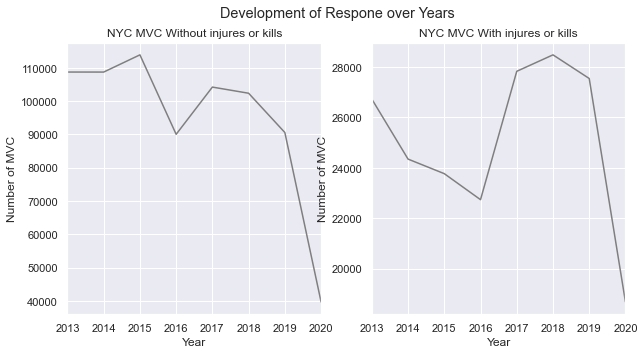

In [38]:
grouping = Data.groupby(['Response','Year']).count()['CRASH DATE']

fig, axs = plt.subplots(1, 2,figsize=(10, 5))
fig.suptitle('Development of Respone over Years')

axs.flat[0].set_title('NYC MVC Without injures or kills')
axs.flat[0].set_ylabel('Number of MVC')
grouping[0].plot(ax=axs.flat[0], color= 'tab:gray')    

axs.flat[1].set_title('NYC MVC With injures or kills')
grouping[1].plot(ax=axs.flat[1], color= 'tab:gray')    
axs.flat[1].set_ylabel('Number of MVC')

plt.show;

""" Free Memory """ 
del(grouping)

**Comments:**

Above we see the Responses **(Non-Serious vs Serious accidents)** thoughout the years 2013 to 2020. 

- First, we realise the dramatic decrease of the accidents in total in 2020 due to the **COVID global pandemic**.


- In 2015, we see that even though we see a peak at non-serious collisions at 2015, actually the serious collisions aren't that much! Actually 2015 is the third year with the least amount of serious collisions (after 2020 and 2016).


- In **2016 we see an overall decrease in both serious and non serious collisions**. Actually, removing the 2020 (due to the global pandemic that is a special situation) **2016 is the year with the least collisions**.


- **In 2018 and 2019 the serious collisions in New York City actually skyrocket** peaking at 2018 with more than 28,000 serious accidents. 

## Response over Borough Plot

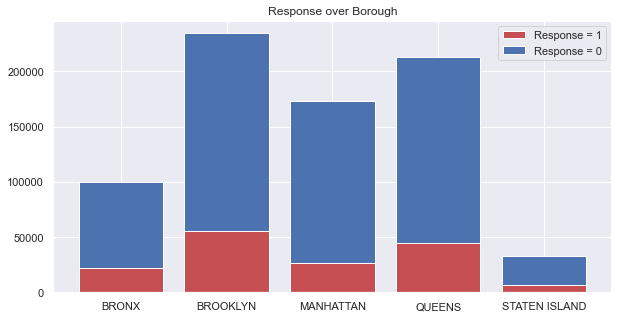

In [39]:
""" Define related data """
serious = Data[Data['Response'] == 1]
nonserious = Data[Data['Response'] == 0]

serious_acc = serious.groupby(['BOROUGH']).count()['CRASH DATE']
nonserious = nonserious.groupby(['BOROUGH']).count()['CRASH DATE']
boroughs = serious_acc.index

""" Plot """
plt.figure(figsize=(10, 5))
plt.title("Response over Borough")
plt.bar(boroughs, serious_acc, color='r', label='Response = 1')
plt.bar(boroughs, nonserious, bottom=serious_acc, color='b', label='Response = 0')
plt.legend()
plt.show()

**Comments**:

Above we see the `Response` (meaning the serious (in red) VS the non-serious (in blue) accidents) over Borough. 

- We see that the **correlation of serious accidents to the number of non-serious ones**.


- **Brooklyn** is first in accidents, followed by **Queens** and then **Manhattan**. Following the big 3 we have **Bronx** and **Staten Island** with much lesser accidents accordingly.

## Response over 24 Hours Plot

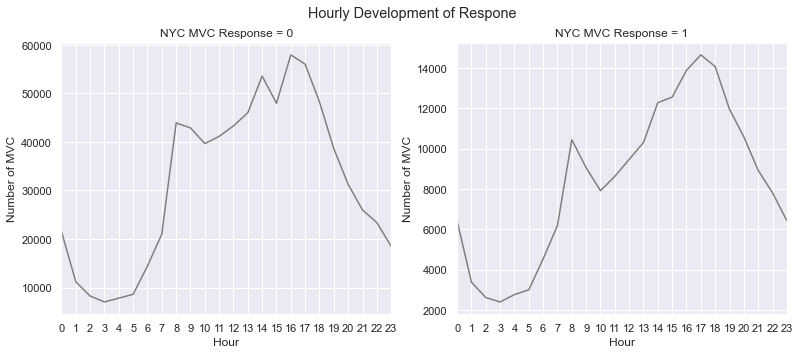

In [40]:
grouping = Data.groupby(['Response','Hour']).count()['CRASH DATE']

fig, axs = plt.subplots(1, 2,figsize=(13, 5))
fig.suptitle('Hourly Development of Respone')

axs.flat[0].set_title('NYC MVC Response = 0')
axs.flat[0].set_ylabel('Number of MVC')
axs.flat[0].set_xticklabels(list(grouping[0].index))
axs.flat[0].set_xticks(np.arange(0,24,1))

grouping[0].plot(ax=axs.flat[0], color= 'tab:gray')    

axs.flat[1].set_title('NYC MVC Response = 1')
axs.flat[1].set_ylabel('Number of MVC')
axs.flat[1].set_xticklabels(list(grouping[0].index))
axs.flat[1].set_xticks(np.arange(0,24,1))
grouping[1].plot(ax=axs.flat[1], color= 'tab:gray')    

plt.show();

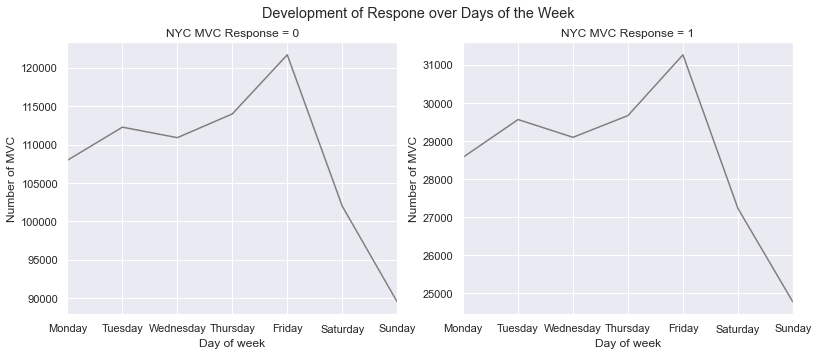

In [41]:
""" First Transfer 'DayOfWeek' from Categorical to ordered Categorical variable """
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Data['Day of week'] = pd.Categorical(Data['Day of week'], categories=cats, ordered=True)

""" define related data  """
grouping = Data.groupby(['Response','Day of week']).count()['CRASH DATE']

""" plot """
fig, axs = plt.subplots(1, 2,figsize=(13, 5))
fig.suptitle('Development of Respone over Days of the Week')

axs.flat[0].set_title('NYC MVC Response = 0')
axs.flat[0].set_ylabel('Number of MVC')
axs.flat[0].set_xticklabels(list(grouping[0].index))
axs.flat[0].set_xticks(np.arange(0,7,1))
grouping[0].plot(ax=axs.flat[0], color= 'tab:gray')    


axs.flat[1].set_title('NYC MVC Response = 1')
axs.flat[1].set_ylabel('Number of MVC')
axs.flat[1].set_xticklabels(list(grouping[0].index))
axs.flat[1].set_xticks(np.arange(0,7,1))
grouping[1].plot(ax=axs.flat[1], color= 'tab:gray')    

plt.show();

## Correlation Matrix Plot

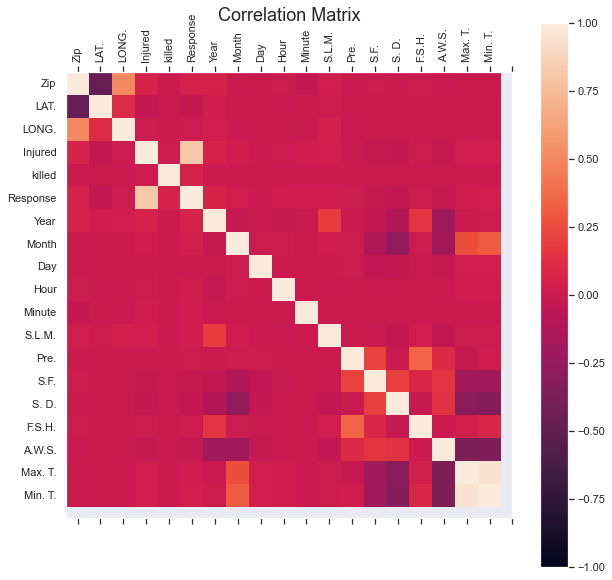

In [42]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(Data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,len(Data.select_dtypes(exclude=object).columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(['Zip', 'LAT.', 'LONG.', 'Injured','killed', 'Response', 'Year', 'Month', 'Day', 'Hour','Minute', 'S.L.M.', 'Pre.', 'S.F.','S. D.', 'F.S.H.', 'A.W.S.','Max. T.', 'Min. T.'], rotation=90)
ax.set_yticklabels(['Zip', 'LAT.', 'LONG.', 'Injured','killed', 'Response', 'Year', 'Month', 'Day', 'Hour','Minute', 'S.L.M.', 'Pre.', 'S.F.','S. D.', 'F.S.H.', 'A.W.S.','Max. T.', 'Min. T.'], rotation=0)
plt.grid(False)
plt.title('Correlation Matrix', y=+1.1, fontsize=18)
plt.show()


""" Free Memory """ 
del(ax, cax)

**Comments**:

Above we see the correlation matrix of our features. Key insights;

- Speed Limit Mode is kind of related to Year. This is validated because "On November 7, 2014, New York City’s default speed limit was changed from 30 mph to 25 mph." [Source](https://data.cityofnewyork.us/Transportation/VZV_Speed-Limits/7n5j-865y)


- Fog, Snow and Haze is related to Rainfall and Years. This seems logical as some years might have rougher winters. As in the case of 2014 we mentioned before. [Read this arcticle from New York Times.](https://www.nytimes.com/2014/01/22/nyregion/east-coast-snowstorm-takes-aim-at-new-york-region.html)


- Wind Speed is related with Snow Fall and Rain Fall.


- Maximum and Minimum temperatures are correlated.

## Jitter-plots:

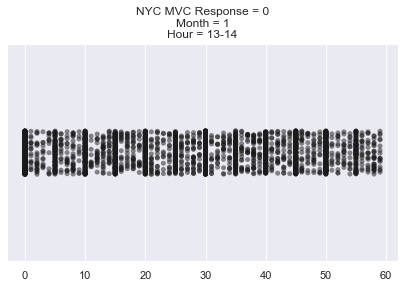

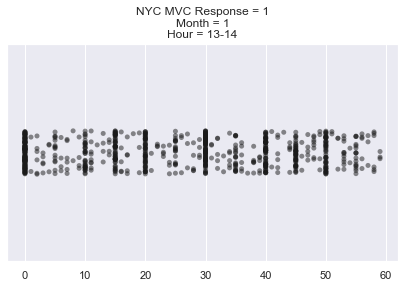

In [43]:
""" Init filtered data for Jitter plotS """ 
month = 1
hour = 13

""" Jitter plot 01 : No-Response """
data_Jit = Data[Data['Response']==0] 
data_Jit = data_Jit[data_Jit['Month']==month]
data_Jit = data_Jit[data_Jit['Hour']==hour].reset_index(drop=True)
plt.figure(figsize=(7, 4))
sns.stripplot(data_Jit['Minute'].values, jitter=True, edgecolor='none', alpha=.50 ,color='k')
plt.title('NYC MVC Response = 0\nMonth = '+ str(month) + '\nHour = ' + str(hour) + '-'+ str(hour+1))
plt.show()

""" Jitter plot 02 : With-Response """
data_Jit = Data[Data['Response']==1] 
data_Jit = data_Jit[data_Jit['Month']==1]
data_Jit = data_Jit[data_Jit['Hour']==13]
plt.figure(figsize=(7, 4))
sns.stripplot(data_Jit['Minute'].values, jitter=True, edgecolor='none', alpha=.50 ,color='k')
plt.title('NYC MVC Response = 1\nMonth = '+ str(month) + '\nHour = ' + str(hour) + '-'+ str(hour+1))
plt.show()

""" free memory """
del(data_Jit)

**Comments**:

The figure above shows a jitter-plot of New York City Collisions in January, with collisions with/ without injuries/kills 2003-2017 between 13.00 - 14.00.

The pattern of **non-injuries/kills is much busier** that the lethal car accidents. This makes sense. 

We also observe a high amount of accident being registered only at intervals of 10 mins (the officers rounded up the numbers to simplify the time) but the are also other **lethal accidents** that **depict the exact minute**.

##  Histogram-Plots:

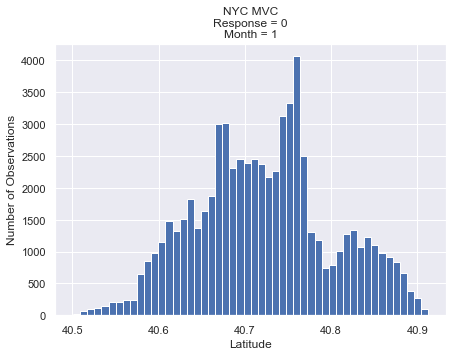

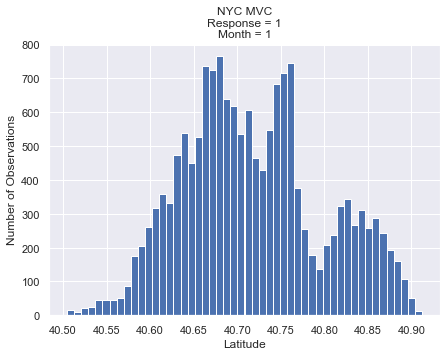

In [44]:
""" Init filtered data for histogram plot """ 
month = 1

""" histogram 01: No-Respone """
data_Hist = Data[Data['Response']==0]
data_Hist = data_Hist[data_Hist['Month'] == month]
plt.figure(figsize=(7, 5))
plt.hist(data_Hist['LATITUDE'],bins= 50) 
plt.title("NYC MVC\nResponse = 0\nMonth = " + str(month))
plt.xlabel("Latitude")
plt.ylabel("Number of Observations")
plt.show()                      

""" histogram 02: With-Respone """
data_Hist = Data[Data['Response']==1]
data_Hist = data_Hist[data_Hist['Month'] == month]
plt.figure(figsize=(7, 5))
plt.hist(data_Hist['LATITUDE'], bins=50) 
plt.title("NYC MVC\nResponse = 1\nMonth = " + str(month))
plt.xlabel("Latitude")
plt.ylabel("Number of Observations")
plt.show()

""" free memory """
del(data_Hist)

**Comments:**

The above are **histograms** that show the latitude distribution of the two responses in only January from 2013 until 2020 using 50 bins.

It can be seen that the two crimes histograms shows **mixed Gaussian** spatio-temporal distributions (January & latitude), excluding the high peak noise/outliers.

 ## Map-plot:

In [45]:
""" Init filtered data for map plot """ 
select_month    = 1
start_year      = 2020
end_year        = 2021
start_hour = 12  
end_hour = 18

""" Map data """
data_Map = Data[
            (Data['Month'] == select_month) &
            (Data['Year'] >= start_year) &
            (Data['Year']  < end_year) &
            (Data['Hour'] >= start_hour) &
            (Data['Hour']  < end_hour)
            ].reset_index(drop=True).loc[:,['CRASH DATE', 'CRASH TIME', 'LATITUDE','LONGITUDE','Response']]

""" Create a NYC Map instances """
MapNYC = folium.Map(
            location = [40.730610, -73.935242], 
            tiles = 'Stamen Toner',
            zoom_start = 12)

""" Add Marker for the City Hall to Map"""
folium.Marker(
    location = [40.712772, -74.006058],
    popup = 'City Hall',
    icon = folium.Icon( 
                color='blue',
                icon='university',
                prefix='fa')).add_to(MapNYC)

""" Start adding points """
for i, row in data_Map.iterrows():
    if(row['Response']==1):
        folium.CircleMarker(
            location = [row['LATITUDE'], row['LONGITUDE']],
            radius=1,
            popup='Either Injure or Kill Occurred\nin ' + str(row['CRASH DATE']) +"\nat " + str(row['CRASH TIME']),
            color='red',
            opacity=0.5).add_to(MapNYC)

    else:
        folium.CircleMarker(
            location = [row['LATITUDE'], row['LONGITUDE']],
            radius=1,
            popup='Neither Injure nor Kill Occurred\nin ' + str(row['CRASH DATE']) +"\nat " + str(row['CRASH TIME']),
            color='blue',
            opacity=0.5).add_to(MapNYC)

""" Display Map"""
display(MapNYC)

""" Free memory """
del(data_Map, MapNYC)

**Comments:**

The above field gives the user the ability to pick a collision and display its incidents on the map **for a selected period, specified with a Start and End Date**. 

We chose to visualize the **serious/lethal collisions with red** and the **non-serious collisions with blue** in New York City for the month of **January 2020**.

We observe that the **Central Park/ Manhattan** in general is very heavy in collisions and also for **Brooklyn**. 

We also, see the number of **non-serious collisions (blue)** is much bigger than the **serious/lethal ones**.

 ## Bokeh-Plot:

 Define a general **Bokeh-plot function**, for all Contributing Factors and Vehicle Types:

In [46]:
def Bokeh_plot(plotMe):
    # Function Descreption:  
    """
    Bokeh_plot(plotMe): 
        # A general Bokeh-plot function, for all Contributing Factors and Vehicle Types.
        # Takes plotMe:String, with one of the corresponding possible values: 
            - 'VEHICLE TYPE CODE 1'
            - 'VEHICLE TYPE CODE 2'
            - 'CONTRIBUTING FACTOR VEHICLE 1'
            - 'CONTRIBUTING FACTOR VEHICLE 2'
        # Returns:
            Bokeh plot or Error for invalid PlotMe value
    """

    # Check parameter values: 
    if not( (plotMe == 'VEHICLE TYPE CODE 1') | 
            (plotMe == 'VEHICLE TYPE CODE 2') |
            (plotMe == 'CONTRIBUTING FACTOR VEHICLE 1') | 
            (plotMe == 'CONTRIBUTING FACTOR VEHICLE 2')
        ): # Notice the sad face, COOL! 
        raise TypeError(
            "Not allowed parameter value for 'plotMe' in function 'Bokeh_plot'\n" +
            "The allowed parameter values are:\n" +
            "   - 'VEHICLE TYPE CODE 1'\n" +
            "   - 'VEHICLE TYPE CODE 2'\n" +
            "   - 'CONTRIBUTING FACTOR VEHICLE 1'\n" +
            "   - 'CONTRIBUTING FACTOR VEHICLE 2'\n"
        )

    # Define parameter corresponding Focus list:
    Focus = []
    if ((plotMe == 'VEHICLE TYPE CODE 1') | (plotMe == 'VEHICLE TYPE CODE 2')):
        Focus = Focus_Vehicle_Types
    else:
        Focus = Focus_Factors_Types

    # Define parameter corresponding Figure height and width:
    plot_height,plot_width = 0,0 
    if ((plotMe == 'VEHICLE TYPE CODE 1') | (plotMe == 'VEHICLE TYPE CODE 2')):
        plot_height=400
        plot_width=800
    else:
        plot_height=550
        plot_width=800

    # Pivot Data (Table) for Bokeh:
    Table = pd.pivot_table(Data, 
                        index = 'Hour', 
                        columns = plotMe,
                        values = 'CRASH DATE',
                        aggfunc = 'count')

    # Normalize: (div by sum)
    Table = Table.div(Table.sum(axis=0), axis=1)

    # Add Hour column (We need Hour it for Bokeh)
    Table['Hours']=Table.index

    # Convert data to bokeh data 
    source = ColumnDataSource(Table)

    # Create an Empty Bokeh Figure.
    """ first, define x_range. It should be FactorRange of str(x_axis_values) """
    x_range = list(map(str, Table['Hours'].values))  
    x_range = FactorRange(factors=x_range)

    """ then, create the figure """
    p = figure(x_range = x_range, 
            plot_height = plot_height,
            plot_width = plot_width,
            title='Hourly distribution of ' + plotMe.lower(),
            x_axis_label='Hour', 
            y_axis_label='Frequency'
            )
    
    # Loop to create a barplot for each label: 
    """ first, Define colors (one color for each label): """
    if ((plotMe == 'VEHICLE TYPE CODE 1') | (plotMe == 'VEHICLE TYPE CODE 2')):
        colors = palettes.Category20[20] 
    else:
        colors = palettes.Category20[20]
        colors.insert(15, '#000000')

    """ then,
    Define an empty list to store legend items. 
    The list contains tuples of label and the corresponding barplot list. 
    Syntax:[(label, [p.vbar]), ....]   
    This will be used later to extract legends using Legend function.
    """
    legend_items = []

    """ start looping """
    for i, label in enumerate(Focus):
        """ 
        p.vbar is a barplot of hour vs fraction. 
        For para see https://docs.bokeh.org/en/latest/docs/reference/plotting.html#bokeh.plotting.Figure.vbar  
        """
        vertical_bars  = p.vbar(x='Hours',  # x_axis (column name from Table), see Table['Hours']  
                        top=label,          # y_axis (column name from Table), see Table 
                        source=source,      # Table in Bokeh format 
                        width=0.9,          # width of each bar in vbar 
                        color=colors[i],    # color each label from the colors list
                        muted=True,         # Start the plot muted 
                        muted_alpha=0.005,  # Shadow of each barplot 
                        fill_alpha=1,       # how much to fill each bar in the barplot 
                        line_alpha=1)       # how much to fill the border of each bar in the barplot
        legend_items.append((label, [vertical_bars])) # store to legend_items list
        
    # Start the interactive figure p
    """ First, Extract legends, legends has the label name and info from the cor. barplot's info """
    legend = Legend(items=legend_items)

    """ Then, define legends' Place. """
    p.add_layout(legend, 'left')

    """ Define the click policy """
    p.legend.click_policy = 'mute'

    """ show """
    show(p)

    """ Return the HTML file """
    return (file_html(p, CDN, plotMe))

In [47]:
""" List that contains Bokeh HTML """
HTML = []

**Bokeh-plot: Vehicle Type Code 1**

In [48]:
HTML.append(Bokeh_plot('VEHICLE TYPE CODE 1'))

**Comments:**

The reader can investigate the interactive bookeh plots depicting the Hourly distribution of the vehicle type code 1's. 

Key insights;

- Most of the vehicle types hoursly distribution appear **Gaussian distributed**


- `Sedan`, `Bike`, `Passenger Vehicles` and `Sport Utility Vehicles` are close to normal distributions but a bit **skewed to the right.**


- `Taxi` looks like a **uniform distribution.**


- Finally, `Bus` is a **mixed-Gaussian** with a means at morning hours 7-8am and 3-4pm. The rush hours. 

**Bokeh-plot: Vehicle Type Code 2**

In [49]:
HTML.append(Bokeh_plot('VEHICLE TYPE CODE 2'))

**Comments:**

The reader can investigate the interactive bookeh plots depicting the Hourly distribution of the vehicle type code 2's.

- Most of the vehicle types hoursly distribution appear **Gaussian distributed**.


- `Sedan`, `Bike` and `Sport Utility Vehicles` appear normal distributed a bit **skewed to the right**.


- `Bus` maintains again a **mixed-Gaussian** with a means at morning hours 7-8am and 3-4pm. The rush hours. 

**Bokeh-plot: Contributing Factor Vehicle 1**

In [50]:
HTML.append(Bokeh_plot('CONTRIBUTING FACTOR VEHICLE 1'))

**Comments:**

The reader can investigate the interactive bookeh plots depicting the Hourly distribution of the contributing factors vehicle 1's.

- Most factors/distributions appear **Gaussian with a tendency for a right skweness.**


- **`Unsage Speed`** is a factor that occurs thoughout the hours of the day, thus it is **uniform distributed**


- **`Alcohol Involvement`** happens mainly at evening to morning hours. It looks like an **inversed Gaussian distribution**, known as Wald distribution

**Bokeh-plot: Contributing Factor Vehicle 2**

In [51]:
HTML.append(Bokeh_plot('CONTRIBUTING FACTOR VEHICLE 2'))

**Comments:**

The reader can investigate the interactive bookeh plots depicting the Hourly distribution of the contributing factors vehicle 1's.

- Most factors/distributions appear **Gaussian with a tendency for a right skewness.**


- **`Alcohol Involvement`** for contributing factor vehicle 2 is very unbalanced depicting a bit as a uniform distribution. This means the vehicle 2 driver many times throughout the day collide due to Alcohol Involvement.

 
---

# <span style="color:MediumSlateBlue">Clear All Variables:</span>

---


In [52]:
%reset -f

  ---

  
 # <span style="color:MediumSlateBlue     ">Final Project | Explainer Notebook.</span>

 ## <span style="color:MediumSlateBlue     ">Part 03 - Data Analysis 02 (Machine Learning).</span>


<span style="color:MediumSlateBlue     ">**02806 Social data analysis and visualization**</span>

<span style="color:MediumSlateBlue     ">**May 2021**</span>

<span style="color:MediumSlateBlue     "> **Data-sets Reference: Motor-Vihecle-Collisions<sup>[link](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)</sup>, Weather-Data<sup>[link](https://www.ncdc.noaa.gov/cdo-web/search)</sup>, Speed-Limit-Data<sup>[link](https://data.cityofnewyork.us/Transportation/VZV_Speed-Limits/7n5j-865y)**</sup></span>

  ---
  

<span style="color:Orange">**Please note!**</span> At the end of this part, there is a ***Discussion*** part where we:

- Summarize the algorithm we used to approach solving the classification problem at hand.
- Clarify in further details the choices we made.
  
<span style="color:Orange">**Please note!**</span> If you are using Jupyter to display this ".ipynb" file You might need to make it *Trusted* in order to let Jupyter render the plots.
   

---

# <span style="color:MediumSlateBlue">Import Needed Libraries and Set Seed:</span>

---

First we start by importing needed Libraries

In [53]:
""" IPython """
from IPython.display import display
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

""" Data Handeling """
import numpy as np 
import pandas as pd 
from pandas import set_option
import calendar
import os 

""" Plot """ 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import tree


""" for warnings """
import warnings 
warnings.simplefilter("ignore")

""" for Statistic """
from scipy.stats import ks_2samp

""" for Data Preprocessing  """
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

""" for Cross Validation """
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

""" for Models """
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

""" for Report Metrics """ 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_confusion_matrix

""" seed """
seed = 123


---

# <span style="color:MediumSlateBlue">Load Data:</span>

---


In [54]:
""" Path """
fileName = 'MVC_SL_W_Final.csv'
filePath = os.path.abspath(os.path.join(os.getcwd(), fileName))

""" Load """
Data =  pd.read_csv(filePath, index_col=0);



---

# <span style="color:MediumSlateBlue">Testing for different spatio-temporal distribution:</span>

---


 [**Kolmogorov-Smirnov statistic**](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) of the two response values is tested, accordingly **on the attributes 'LATITUDE', 'Hour' and 'Month'**. 
 
Specifically, the two-sample Kolmogorov-Smirnov test is performed to check whether the response labels are drawn from the same distribution under the significance level $α = 0.05$. If the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples is the same. 

In [55]:
""" Kolmogorov-Smirnov on Latitude """
d1 = Data[Data['Response'] == 0]['LATITUDE']
d2 = Data[Data['Response'] == 1]['LATITUDE']
print("Test for Latitude different distribution under \u03B1 = 0.5 is: ", ks_2samp(d1, d2)[1]<0.5)

Test for Latitude different distribution under α = 0.5 is:  True


In [56]:
""" Kolmogorov-Smirnov on Hour """
d1 = Data[Data['Response'] == 0]['Hour']
d2 = Data[Data['Response'] == 1]['Hour']
print("Test for Hour different distribution under \u03B1 = 0.5 is: ", ks_2samp(d1, d2)[1]<0.5)

Test for Hour different distribution under α = 0.5 is:  True


In [57]:
""" Kolmogorov-Smirnov on Month  """
d1 = Data[Data['Response'] == 0]['Month']
d2 = Data[Data['Response'] == 1]['Month']
print("Test for Month different distribution under \u03B1 = 0.5 is: ", ks_2samp(d1, d2)[1]<0.5)

Test for Month different distribution under α = 0.5 is:  True


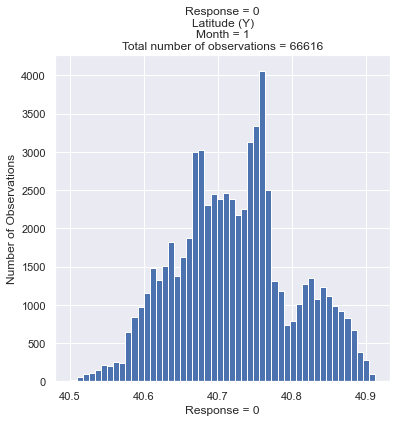

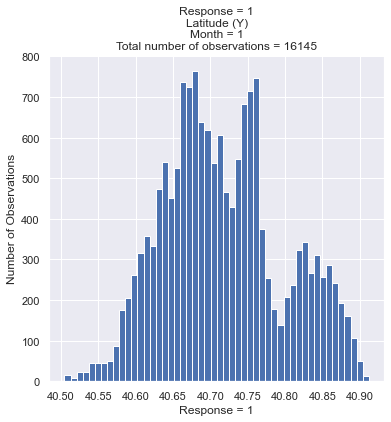

In [58]:
""" Plot the two response distribution for January """
month = 1
for response in [0,1]:
    d = Data[Data['Response'] == response]
    d = d[d['Month']==month]
    plt.figure(figsize=(6, 6))
    plt.hist(d['LATITUDE'], bins=50) 
    plt.title( "Response = " + str(response) + "\nLatitude (Y)" + '\nMonth = '+ str(month) + '\nTotal number of observations = '+ str(len(d)))
    plt.xlabel("Response = " + str(response))
    plt.ylabel('Number of Observations')
    plt.show()

""" free memory """
del (d,d1,d2)

Above are histograms that show the latitude distribution of the two 'Response' labels, in only January from 2013 until 2021 using 50 bins. It can be seen that the two crimes histograms shows different spatio-temporal distributions.


---

# <span style="color:MediumSlateBlue">Slice needed features for learning:</span>

---
Below we slice the needed features for learning:

    Y variable: 'Response'
    
    X-Matrix: 
        Time features: 'Month', 'Day of week', 'Hour' 
        Place features: 'ON STREET NAME'
        Vehicle features: 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2'
        Casual features: 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2'
        Speed Features: 'SPEED LIMIT MODE'
        Weather features: 'PRECIPITATION', 'SNOW FALL', 'SNOW DEPTH','FOG, SMOKE OR HAZE', 'AVERAGE WIND SPEED', 'MAXIMUM TEMPERATURE', 'MINIMUM TEMPERATURE'.

We dropped the 'LATITUDE', 'LONGITUDE',  'BOROUGH' and 'ZIP CODE' since we have 'ON STREET NAME'. On the other hand, combining the three features Month, DayOfWeek and Hour can best describe the time-related information.

In [59]:
""" Slice features for learning: """ 
data = Data[['Response', 'Month', 'Day of week', 'Hour', 'ON STREET NAME','VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2','CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2','SPEED LIMIT MODE','PRECIPITATION', 'SNOW FALL', 'SNOW DEPTH','FOG, SMOKE OR HAZE', 'AVERAGE WIND SPEED', 'MAXIMUM TEMPERATURE', 'MINIMUM TEMPERATURE']].copy()

""" free memory """
del(Data)

---

# <span style="color:MediumSlateBlue">Class Balance:</span>

---

Since we don't want to increase the probability of classifying any new random point as the class (Response = 0) with more occurrences.

Here we will use the **Down-sample Majority Class** method
see [link](https://elitedatascience.com/imbalanced-classes)


In [60]:
""" count data """
print('Count Response labels before Class Balance:')
print(data['Response'].value_counts())

""" Separate majority and minority classes """
data_majority   = data[data['Response']==0]
data_minority   = data[data['Response']==1]
 
""" Downsample class """
data_majority = resample(data_majority, 
                    replace=False,                  # sample without replacement
                    n_samples=len(data_minority),   # to match minority class
                    random_state=seed)              # reproducible results

data_minority = resample(data_minority, 
                    replace=False,                  # sample without replacement
                    n_samples=len(data_minority),   # to match minority class
                    random_state=seed)              # reproducible results


""" Combine minority class with downsampled majority class """
data_downsampled = pd.concat([data_majority, data_minority])

""" Shuffle DataFrame rows and reset index """
data = data_downsampled.sample(frac=1, random_state=seed).reset_index(drop=True)

""" Check and Display new class counts """
print('\nCount Response labels after Class Balance:')
print(data['Response'].value_counts())

""" free memory """
del(data_majority,data_minority,data_downsampled)

Count Response labels before Class Balance:
0    758237
1    200134
Name: Response, dtype: int64

Count Response labels after Class Balance:
1    200134
0    200134
Name: Response, dtype: int64


---

# <span style="color:MediumSlateBlue">Define Data Preprocessor:</span>

---

The below preprocessor will be used as a first step in the pipeline models for **data processing**. Defining it this way can allow us to use it in each cross-validate fold. The reason behind that is to prevent leaking information from training to test data.

In [61]:
""" numerical features """
numeric_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('stand', StandardScaler())
        ])

""" categorical features """
categorical_transformer = Pipeline(
    steps = [
        ('enc', OrdinalEncoder(handle_unknown= 'ignore')),
        ('stand', StandardScaler())
        ])

""" Features-preprocessor """
num_cols = list(data.select_dtypes('number').columns)
num_cols.remove('Response')
cat_cols = list(data.select_dtypes('object').columns)
preprocessor = ColumnTransformer(
        transformers=[
        ('num', numeric_transformer,num_cols),
        ('cat', categorical_transformer,cat_cols )
        ])

---

# <span style="color:MediumSlateBlue">Split data for Learning:</span>

---


In [62]:
""" Split-out X,Y dataset """
X = data.iloc[:,1:]
Y = data.iloc[:,0]

""" Split-out validation dataset """
validation_size = 0.95  
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed, stratify=Y)
print (f'{len(Y_train)} samples to train on and {len(Y_validation)} to validate the final model on (unseen data)')

20013 samples to train on and 380255 to validate the final model on (unseen data)


---

# <span style="color:MediumSlateBlue">Compare Algorithms:</span>

---

Here we compare the performance of the two algorithms we have been introduced to **RandomForest, DecisionTree and Logistic Regression** on the training data (Both with sklearn default settings) using 5 Stratified fold CV.


Here we chose to have recall (also called the Sensitivity) as a scoring metric since it is the true positive rate. It is the number of instances from the positive (response = 1) class that actually predicted correctly and this is what we are intressted in.

LR: 0.570100 (0.016987)
RF: 0.572100 (0.002144)
DT: 0.608173 (0.008055)


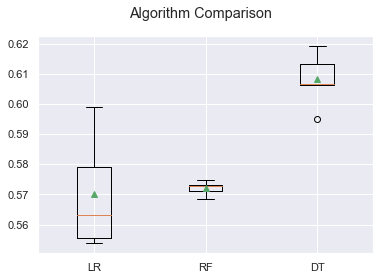

In [63]:
""" scoring """
scoring = 'recall'

""" Pipelines """
pipelines = []
pipelines.append(('LR', Pipeline([('preprocessor', preprocessor),('lr',LogisticRegression())])))
pipelines.append(('RF', Pipeline([('preprocessor', preprocessor),('rf',RandomForestClassifier())])))
pipelines.append(('DT', Pipeline([('preprocessor', preprocessor),('dt',DecisionTreeClassifier())])))

""" CV """
results = []
names = []
for name, model in pipelines:
    skfold = StratifiedKFold(n_splits=5,shuffle= True, random_state=seed) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=skfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

""" Compare Algorithms """
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
plt.show()

Above are the Box and Whisker plots comparing the two algorithms, ** Decision Tree, RandomForest and Logistic Regression**, Performance. It's seen that Decision Tree outcome the other on sklearn default settings. Therefore it's worth it to start tuning Decision Tree and investigate it more.

---

# <span style="color:MediumSlateBlue">Tunning:</span>

---

 ** Decision Tree tuning:**

 By the means of Grid Search CV we are goin to investigate:
 - Criterion (sklearn: criterion)
 - Number of samples at a leaf node (sklearn: min_samples_leaf)
 - Complexity Pruning (sklearn: ccp_alpha)


In [64]:
""" Define models """
model = Pipeline([
    ('preprocessor', preprocessor),
    ('dt',DecisionTreeClassifier())
    ])

""" Define grid parameters """
random_state = [seed] 
criterion        = ['gini', 'entropy']
min_samples_leaf = list(range(0,60,10))
min_samples_leaf.remove(0)
ccp_alpha        = np.linspace(0, 1, 10)
grid = dict(dt__random_state = random_state, dt__criterion=criterion, dt__min_samples_leaf=min_samples_leaf, dt__ccp_alpha=ccp_alpha)

""" Define grid search """
cv = StratifiedKFold(n_splits=5, shuffle= True, random_state=seed)
grid_search = GridSearchCV(estimator = model, param_grid = grid, scoring=scoring, cv = cv, n_jobs = 4, verbose = 2)
grid_result = grid_search.fit(X_train, Y_train)

""" best results """
print("Best Recall: %f (%f) \nUsing %s" % (grid_result.best_score_, grid_result.cv_results_['std_test_score'][grid_result.best_index_], grid_result.best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Recall: 0.617068 (0.003317) 
Using {'dt__ccp_alpha': 0.0, 'dt__criterion': 'entropy', 'dt__min_samples_leaf': 30, 'dt__random_state': 123}


---

# <span style="color:MediumSlateBlue">Report:</span>

---

Here we save the Final Model with the **best hyperparameters** founded in last Grid Search.

Finally, it's time to test the Final Model on the validation (unseen) data and Report results. **See Discussion for results analysis**  

In [65]:
""" Prepare Final Model """
model = Pipeline([
    ('preprocessor', preprocessor),
    ('dt',DecisionTreeClassifier(ccp_alpha=0.0,criterion='entropy', min_samples_leaf=30, random_state=seed))
    ])

model.fit(X_train, Y_train);

In [66]:
""" Classification Report """
predictions = model.predict(X_validation)
print('Accuracy= %.3f' % accuracy_score(Y_validation, predictions))
print('\nClassification Report:\n',classification_report(Y_validation, predictions))

Accuracy= 0.663

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68    190128
           1       0.68      0.62      0.65    190127

    accuracy                           0.66    380255
   macro avg       0.66      0.66      0.66    380255
weighted avg       0.66      0.66      0.66    380255



<Figure size 432x288 with 0 Axes>

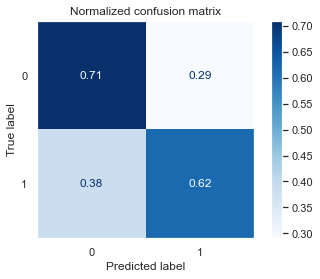

In [67]:
""" Confusion Matrix """
plt.figure()
disp = plot_confusion_matrix(model, X_validation, Y_validation, cmap=plt.cm.Blues, normalize='true', include_values= True) 
disp.ax_.set_title('Normalized confusion matrix')
plt.grid(False)
plt.show()

---

# <span style="color:MediumSlateBlue">Feature importance:</span>

---

Here you go a 5 fold CV to check feature importance. This can be useful not only to check feature importance but also to improve the model or to come with a simpler model that has a relatively reasonable performance.

In [68]:
result = permutation_importance(model, X_train, Y_train, n_repeats=5,random_state=seed, scoring=scoring)
col_names = list(X_train.columns)

for i in result.importances_mean.argsort()[::-1]:
     if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
         print(f"{col_names[i]:<40}"
               f"{result.importances_mean[i]:.3f}"
               f" +/- {result.importances_std[i]:.3f}")

VEHICLE TYPE CODE 2                     0.329 +/- 0.004
CONTRIBUTING FACTOR VEHICLE 2           0.267 +/- 0.005
ON STREET NAME                          0.060 +/- 0.003
CONTRIBUTING FACTOR VEHICLE 1           0.052 +/- 0.002
VEHICLE TYPE CODE 1                     0.038 +/- 0.001
Hour                                    0.027 +/- 0.002
SPEED LIMIT MODE                        0.020 +/- 0.001
MINIMUM TEMPERATURE                     0.016 +/- 0.002
PRECIPITATION                           0.012 +/- 0.002
AVERAGE WIND SPEED                      0.010 +/- 0.001
Month                                   0.008 +/- 0.000
MAXIMUM TEMPERATURE                     0.008 +/- 0.001
FOG, SMOKE OR HAZE                      0.005 +/- 0.001
Day of week                             0.004 +/- 0.001
SNOW DEPTH                              0.003 +/- 0.001


---

# <span style="color:MediumSlateBlue">Tree Plot:</span>

---
Here we gonna plot the Final Model tree  but for visualization perposes we will set the maximum depth to 2.

A little description of the information at each plotted node
 - 1. row: The condition
 - 2. row: The impurity score of the node
 - 3. row: The number of observations at this node
 - 4. row: The number of samples for each class at this node
 - 5. row: The class by majority voting

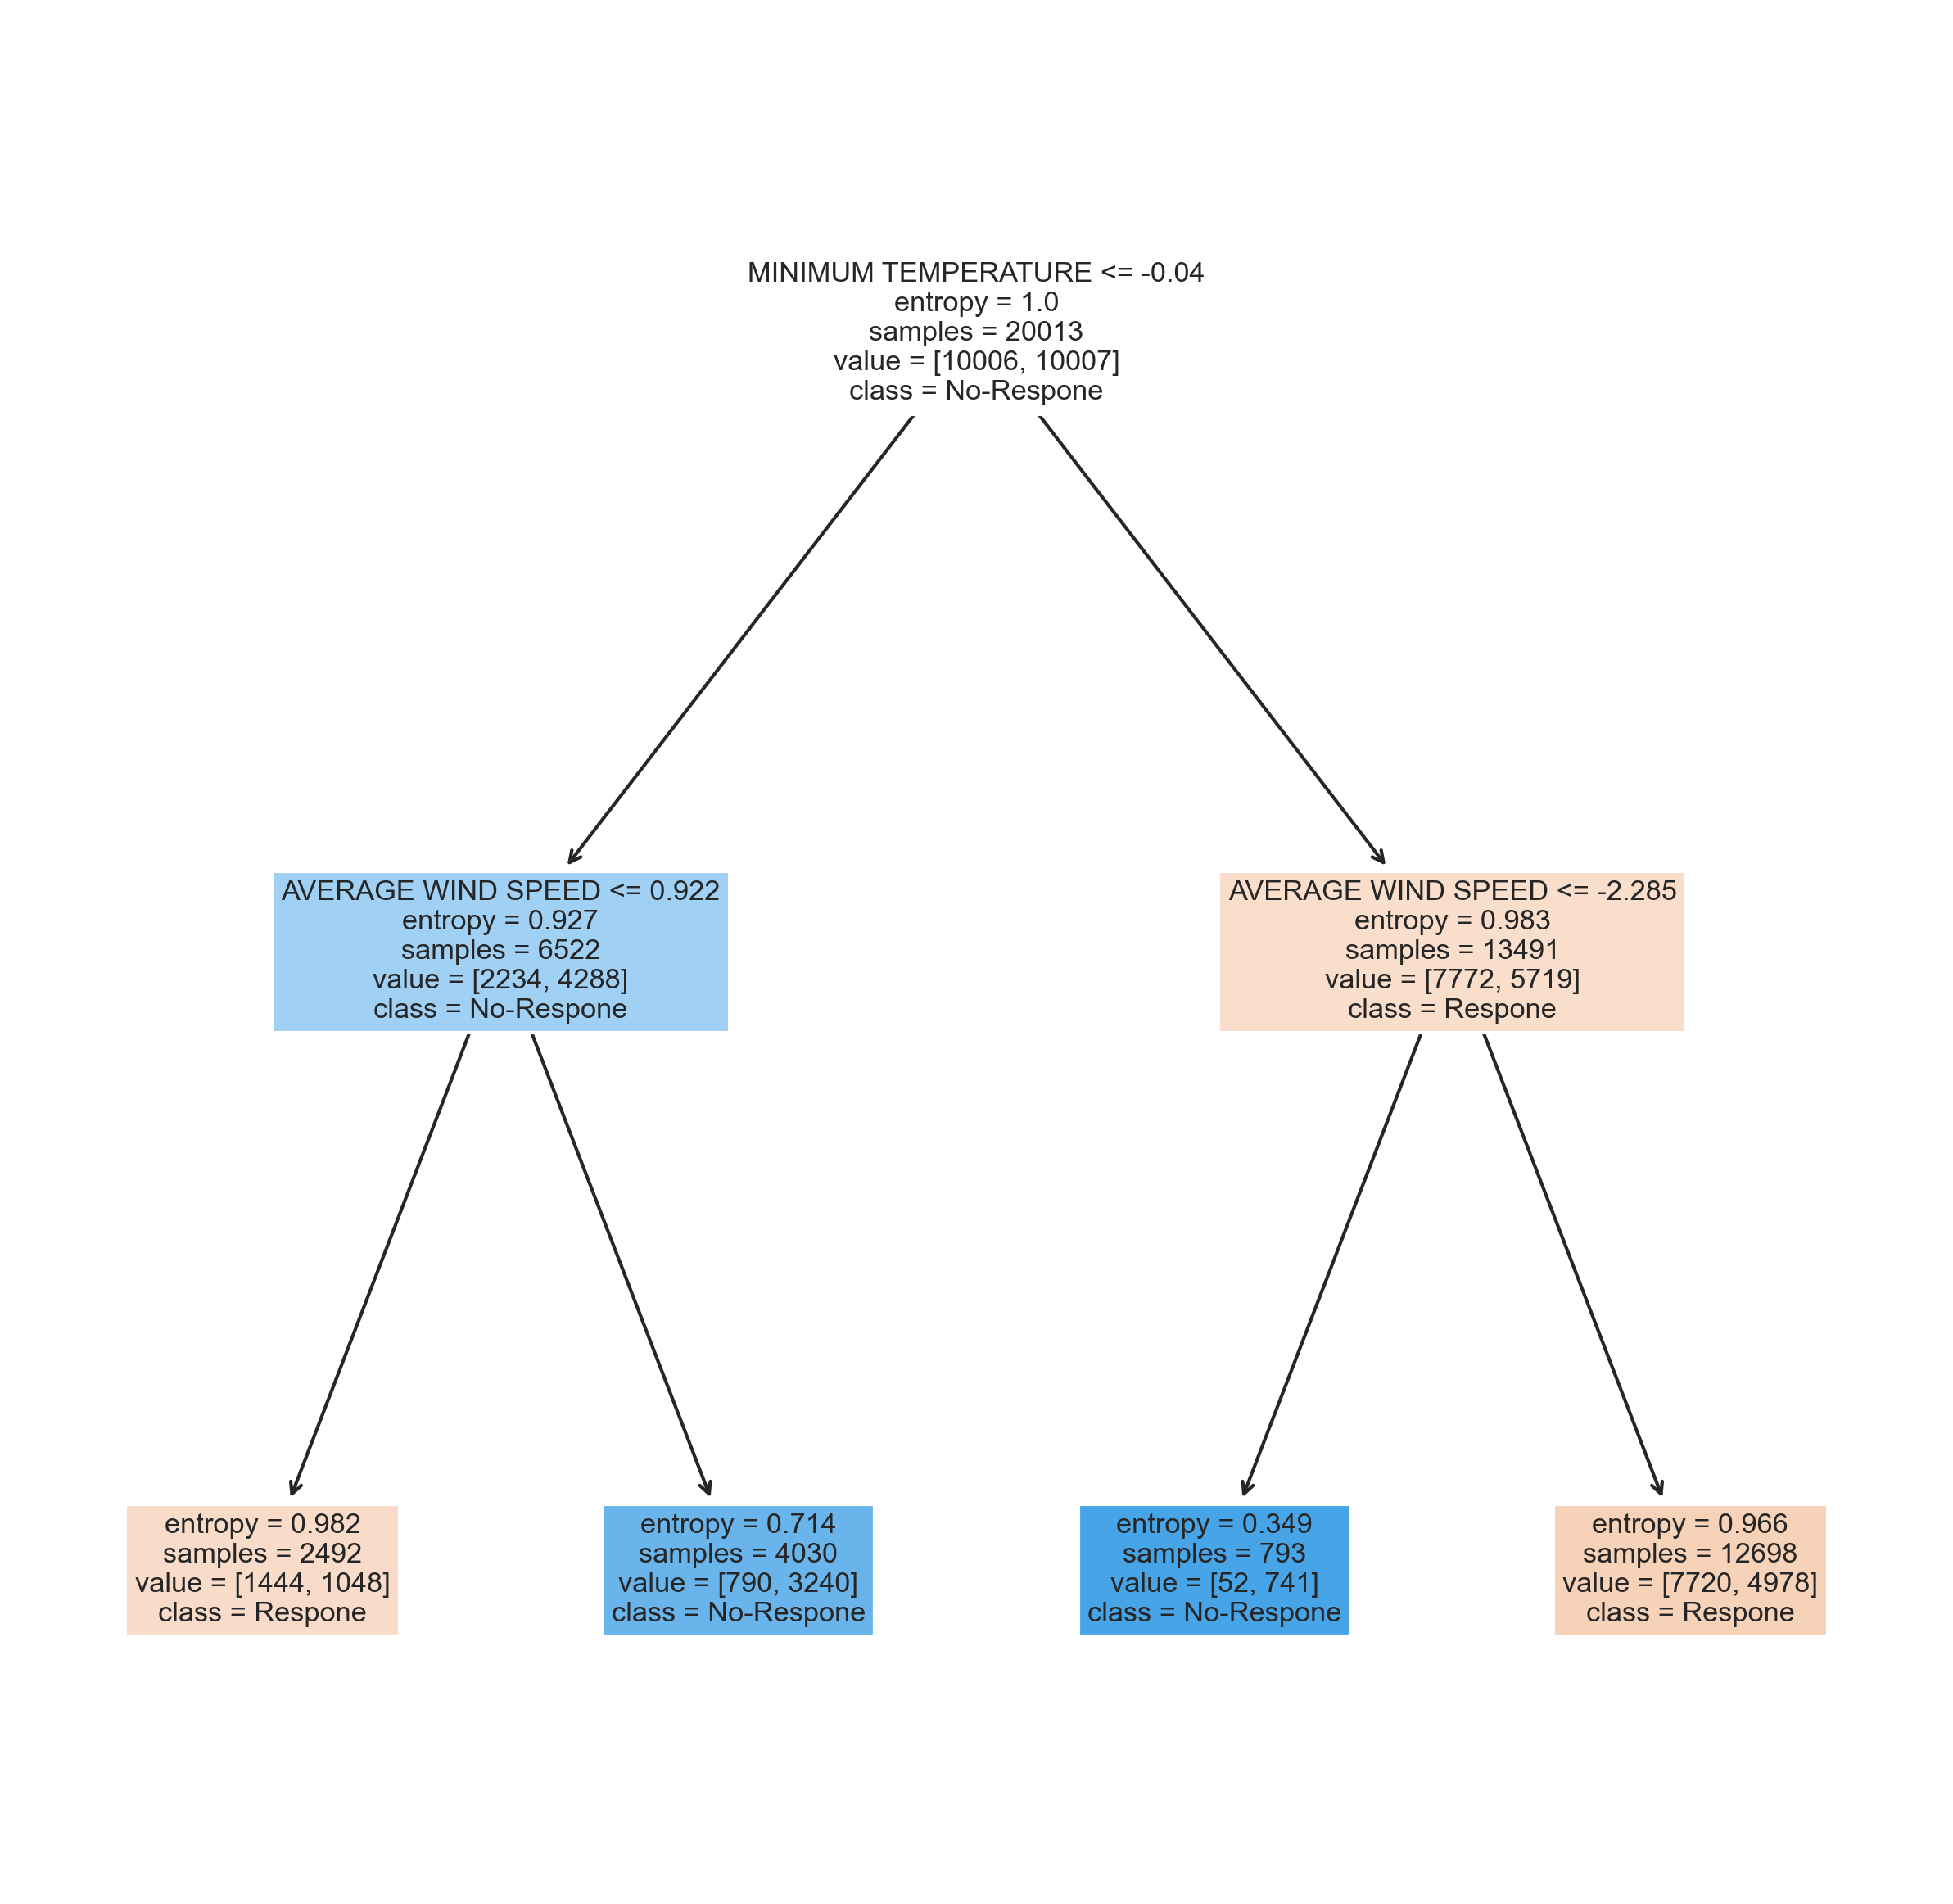

In [69]:

""" Prepare Model to plot tree: Final model with max_depth = 2 """
max_depth = 2
model = Pipeline([
    ('preprocessor', preprocessor),
    ('dt',DecisionTreeClassifier(
                max_depth = max_depth,
                ccp_alpha=0.0,
                criterion='entropy', 
                min_samples_leaf=30, 
                random_state=seed)
                )
    ])
model.fit(X_train, Y_train);

""" plot """
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi=300)
tree.plot_tree(
    model[1],
    feature_names=X_train.columns,
    class_names= ['Respone','No-Respone'], 
    filled = True);

---
# Discussion: 
---

>**Explain about your choices for training/test data, features, and encoding. (You decide how to present your results, but here are some example topics to consider: Did you balance the training data? What are the pros/cons of balancing? Do you think your model is overfitting? Did you choose to do cross-validation? Which specific features did you end up using? Why? Which features (if any) did you one-hot encode? Why ... or why not?))**

***Below is a summary of the algorithm we used to approach solving the classification problem at hand:***
- Load Crime Dataset. 
- Check that the selected two Response labels have indeed different Spatio-temporal distribution (Kolmogorov-Smirnov statistic and histogram)
- Balance Dataset.
- Defined a Data Preprocessor (To be used in each cross-validate fold to prevent leaking information from training to test data).  
- Split Data in stratified way randomly, 5% training 95% validation. (5% to train on is still a lot of data).
- Compare both models with naive (SKlearn deafult) parameters (5 Stratified KFold CV: Random-forest vs LogisticRegression).
- Start tuning the best performing algorithm: 
    - Grid Search (5 Stratified KFold CV) to find hyperparameters focus area.
- Define the final model according to the best combination of hyperparameters founded using the Grid search. 
- Validate the final model on the validation (unseen) data set and Report.
- Investigate which features are the most important.
- Plot the tree. 


***Below is a clarification of the choices we made:*** 
- Choice of features:
  - We choose the features that best describe the Spatio-temporal, Vehicle, causal and weather patterns of a MVC.
- Choice of label encoding: 
  - The number of categories is a bit large within the categorical variables and one-hot encoding can lead to high memory consumption.
  - label encoding can lead to an ordinality problem which means that not-ordinal variables will have an order. Howeever,
  decisions trees work based on increasing the homogeneity of the next level. Thus, it might not be a big problem to label encode the categorical variable here.   
- Choice of class balance: 
  - Since we don't want to increase the probability of classifying any new random point as the class with more examples.
  - The coins is that our model will be trained in a way that emphasizes the minority classes more in favour of the majority class which might not represent the real population.  
- Choices of training/test data:  
  - Split Data in stratified way randomly, 5% training 95% validation since:  
    - We indeed have a lot of data! 5% correspond to 20013  samples to train and 95% correspond to 380255 samples (unseen data) to validate the final model. 
    - Having relatively more data to validate the final can give a more generalized sense of how the model would act on future data. 
    - Having a relatively less but reasonable amount of data(> 10,000) to train on would reduce the computational power needed to tune the model.
    - Random splits since we want to generalize.
    - Stratified splits since we want each split to be balanced. 
  - Tuning the model with 5 Stratified KFold CV since:    
    - We want to minimize the testing bias by having a sufficiently large portion of the dataset for training. Thus, we choose 4/5 of the training data to train on.
    - We want to minimize the testing variance by having a sufficiently large portion of the dataset for testing. Thus, we choose 1/5 of the training data to test on.
- Overfitting:
  - Our model generalizes very well to the validation data (new unseen data) which means that our model is not overfitting.


# Part 5 : 